In [1]:
#Import packages

#Scipy
from scipy import stats 
from scipy.stats import uniform,ranksums 

#Pandas
import pandas as pd
from pandas import DataFrame

#Others
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import preprocessing
from sklearn.decomposition import PCA
import joblib 
import random
import numpy as np
import os
import math
import warnings


In [2]:
#sklearn
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate

In [3]:
def print_RxC(dataframe):
    rows= dataframe.shape[0]
    columns= dataframe.shape[1]
    rows_columns=print(dataframe.shape[0],"Moleculars ×",dataframe.shape[1],"Descriptors")
    return rows_columns
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='spearman')
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [4]:
#Set the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("/data")

FileNotFoundError: [WinError 2] 系统找不到指定的文件。: '/data'

In [8]:
X_NAomit_data= pd.read_csv('./Original data/X_NAomit_data.csv',index_col=0)
Raw_data= pd.read_csv('./Original data/Raw_data.csv',index_col=0)
X_scaled_data=pd.read_csv("./Original data/X_scaled_data.csv",index_col=0)
ML_data=pd.read_csv("./Original data/ML_data.csv",index_col=0)
X_scaled_data=pd.read_csv("./Original data/X_scaled_data.csv",index_col=0)
print_RxC(X_NAomit_data)
X_NAomit_data.head()

71 Moleculars × 4175 Descriptors


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [7]:
#Scale data
Scaler = preprocessing.MinMaxScaler()
Transformer =Scaler.fit(X_NAomit_data)
X_scale_data=Transformer.transform(X_NAomit_data)
X_scale_data =pd.DataFrame(X_scale_data)
X_scale_data.columns=X_NAomit_data.columns
X_scale_data.index=Raw_data.index
print_RxC(X_scale_data)
X_scale_data.head()

71 Moleculars × 4175 Descriptors


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.128645,0.344210,0.080461,0.068574,0.061704,0.061803,0.626247,0.664286,0.241584,0.655409,...,0.0,0.0,0.0,0.31250,0.121212,0.339356,0.21875,0.775326,0.079529,0.156831
Ma_2019_U,0.075722,0.355749,0.027968,0.027742,0.008163,0.014576,0.555490,0.837066,0.089947,0.495217,...,0.0,0.0,0.0,0.00000,0.060606,0.210711,0.09375,0.740235,0.022043,0.038750
Ma_2019_C,0.073472,0.303509,0.035603,0.039171,0.020739,0.031203,0.460756,0.706940,0.073575,0.607187,...,0.0,0.0,0.0,0.00000,0.060606,0.210711,0.09375,0.740235,0.022043,0.038750
Ma_2019_G,0.165381,0.382840,0.098263,0.088160,0.072074,0.077405,0.650332,0.784635,0.195361,0.694387,...,0.0,0.0,0.0,0.15625,0.151515,0.394030,0.34375,0.871200,0.109017,0.278438
Ma_2019_dA,0.091909,0.303087,0.062659,0.048989,0.051335,0.046201,0.600609,0.536172,0.290789,0.613916,...,0.0,0.0,0.0,0.31250,0.090909,0.278607,0.12500,0.713778,0.066666,0.119558


# Figure 1(1b-1e)

## Fig. 1b

In [7]:
Ranksums_data=X_NAomit_data
Ranksums_data["Hydrogel-forming ability"]=Raw_data['Hydrogel-forming ability']
Notgelable=Ranksums_data.loc[Ranksums_data["Hydrogel-forming ability"] == 'Nongelator']
Gelable=Ranksums_data.loc[Ranksums_data["Hydrogel-forming ability"] == 'Gelator']
Ranksums_result=[]
for i in list(Ranksums_data.columns):
 NG = Notgelable[i]
 G = Gelable[i]
 Ranksums_caculate=ranksums(NG, G, alternative='two-sided')
 Ranksums_result.append(Ranksums_caculate)
Ranksums_results = pd.DataFrame(Ranksums_result, columns=['Statistics','Pvalues'])
Ranksums_results.index=Ranksums_data.columns#
Ranksums_results = Ranksums_results.drop('Hydrogel-forming ability',axis = 0)
Ranksums_results.head()

,Statistics,Pvalues
MW,0.293979,0.768774
AMW,-1.158622,0.246610
Sv,0.386207,0.699343
Se,0.755122,0.450176
Sp,0.582193,0.560437


In [8]:
NG_mean=Notgelable.median(axis=0) 
G_mean=Gelable.median(axis=0) 
Difference_mean=(G_mean/NG_mean)
Difference_mean

MW                1.063491
AMW               1.014316
Sv                0.993984
Se                0.942996
Sp                1.004720
                    ...   
s34_relSize       0.999621
s34_phSize        1.145161
s34_phRelSize     1.021358
chiralMoment      1.049045
chiralPhMoment    1.050103
Length: 4175, dtype: float64

In [9]:
Ranksums_results['Difference_mean']=Difference_mean
Ranksums_results['Log_P']=-np.log(Ranksums_results['Pvalues'])
Ranksums_results.head()

,Statistics,Pvalues,Difference_mean,Log_P
MW,0.293979,0.768774,1.063491,0.262958
AMW,-1.158622,0.246610,1.014316,1.399945
Sv,0.386207,0.699343,0.993984,0.357614
Se,0.755122,0.450176,0.942996,0.798117
Sp,0.582193,0.560437,1.004720,0.579039


In [10]:
Ranksums_results.to_csv("./Results/Figs/Fig. 1b.csv",sep=',')

In [11]:
Ranksums_results_a=Ranksums_results.loc[Ranksums_results["Pvalues"] <0.05]
Ranksums_results_b=Ranksums_results.loc[Ranksums_results["Pvalues"] >=0.05]

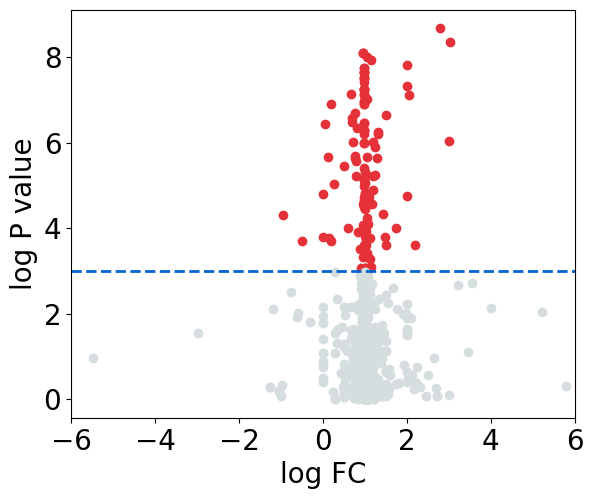

In [12]:
plt.figure(figsize=(6.5, 6))
ax=plt.subplot(111)
plt.gcf().subplots_adjust(bottom=0.20) 
cm1 = plt.cm.get_cmap('Reds')
cm2 = plt.cm.get_cmap('BuPu_r')
sc1=plt.scatter( Ranksums_results_a['Difference_mean'],Ranksums_results_a['Log_P'],c="#e53238", cmap=cm2)
sc3=plt.scatter( Ranksums_results_b['Difference_mean'],Ranksums_results_b['Log_P'],c="#d6dddf", cmap=cm2)
plt.axhline(y=-np.log(0.05), 
            c="#0064d2",
            linestyle='--',
            linewidth=2,
            markerfacecolor='w',
            markersize=10,
         )
plt.tick_params(labelsize=20) 
ax.set_xlabel('log FC',fontsize = 20)
ax.set_ylabel('log P value',fontsize = 20)
plt.xlim(-6,6)
plt.savefig("./Original figure/Fig. 1b.png", dpi=300,format="png")
plt.show()

## Fig. 1c & Fig. S4 

In [13]:
df_corr=ML_data.corr(method='spearman')
df_corr.to_csv("./Results/Figs/Fig. 1c.csv",sep=',')
df_corr

,MATS3p,SM10_AEA(dm),GATS7s,F07[N-O],VE1sign_Dz(v),VE3sign_D/Dt,P_VSA_charge_4,CATS2D_09_DA,B09[O-O],CATS2D_06_DL,...,MATS2m,MATS2p,GATS6i,P_VSA_charge_2,Eig03_AEA(ed),CATS2D_05_DA,GATS2p,C-016,s2_pathLength,GATS8i
MATS3p,1.000000,0.567571,-0.585931,-0.259889,0.667757,0.511688,0.477283,-0.265164,-0.127974,0.249119,...,0.355692,-0.330430,-0.178954,-0.040399,-0.093586,-0.305030,0.248923,0.154612,0.142987,-0.156104
SM10_AEA(dm),0.567571,1.000000,-0.784048,-0.191216,0.434900,0.314948,0.584202,-0.142198,-0.350379,0.083911,...,0.317051,-0.083525,-0.469281,-0.214243,0.144421,-0.116841,0.039695,0.075893,0.167699,-0.182033
GATS7s,-0.585931,-0.784048,1.000000,0.302238,-0.532971,-0.428190,-0.515701,0.451227,0.499239,0.058263,...,-0.088020,0.224518,0.463885,0.205592,0.106859,0.100321,-0.285916,-0.243192,0.101999,0.293040
F07[N-O],-0.259889,-0.191216,0.302238,1.000000,-0.440695,-0.488117,-0.342527,0.772755,0.462625,-0.518182,...,-0.038926,0.496972,0.293191,0.392686,0.735835,0.551468,-0.561609,-0.606210,-0.195507,0.526102
VE1sign_Dz(v),0.667757,0.434900,-0.532971,-0.440695,1.000000,0.541023,0.395395,-0.563455,-0.167349,0.307639,...,0.306666,-0.351706,-0.382018,0.051116,-0.377679,-0.299115,0.543050,0.293116,0.097543,-0.380672
VE3sign_D/Dt,0.511688,0.314948,-0.428190,-0.488117,0.541023,1.000000,0.146712,-0.495850,-0.177965,0.557839,...,0.226280,-0.639217,-0.244427,0.029311,-0.461927,-0.490196,0.514456,0.496234,0.332618,-0.507960
P_VSA_charge_4,0.477283,0.584202,-0.515701,-0.342527,0.395395,0.146712,1.000000,-0.199127,-0.488211,-0.102849,...,0.417302,-0.086269,-0.450276,-0.418457,-0.325651,-0.315714,0.258674,0.331763,0.267133,-0.343470
CATS2D_09_DA,-0.265164,-0.142198,0.451227,0.772755,-0.563455,-0.495850,-0.199127,1.000000,0.376704,-0.273493,...,0.080590,0.545550,0.365013,0.063876,0.660763,0.181874,-0.655244,-0.567647,0.075181,0.633996
B09[O-O],-0.127974,-0.350379,0.499239,0.462625,-0.167349,-0.177965,-0.488211,0.376704,1.000000,-0.037072,...,-0.035158,0.056253,0.381106,0.708565,0.402491,0.278728,-0.123759,-0.357646,-0.194278,0.220796
CATS2D_06_DL,0.249119,0.083911,0.058263,-0.518182,0.307639,0.557839,-0.102849,-0.273493,-0.037072,1.000000,...,0.233659,-0.565000,0.117928,-0.101510,-0.294053,-0.433894,0.318158,0.360456,0.412222,-0.088029


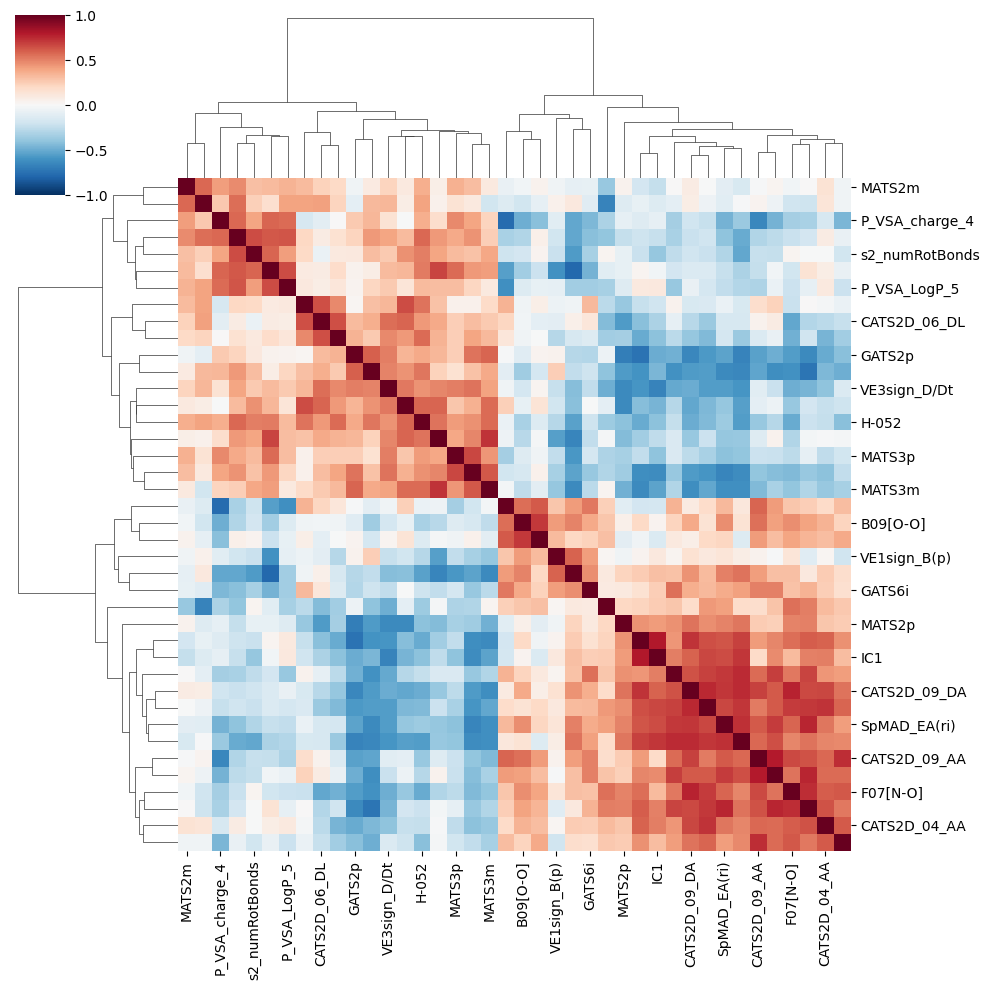

In [14]:
sns.clustermap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False)
plt.savefig('./Original figure/Fig. 1c.png', dpi=600,format="svg")

## Fig. 1d 

In [15]:
pca = PCA(n_components=3,random_state=0)
pca.fit(X_scale_data)
print(pca.explained_variance_ratio_)  
print(pca.explained_variance_)  
print(pca.n_features_)
print(pca.n_features_in_)

[0.48883718 0.15907151 0.075489  ]
[66.24387154 21.55628264 10.2297528 ]
4175
4175


In [16]:
newdf = pca.fit_transform(X_scale_data)
PCA_4175=pd.DataFrame(newdf)
PCA_4175.columns=["PCA1","PCA2","PCA3"]
PCA_4175.index=Raw_data.index
PCA_4175['Hydrogel-forming ability']=Raw_data['Hydrogel-forming ability']
PCA_4175.to_csv("./Results/Figs/Fig. 1d.csv",sep=',')
PCA_4175.head()

,PCA1,PCA2,PCA3,Hydrogel-forming ability
ID,,,,
Ma_2019_A,-8.110369,3.023317,0.228622,Gelator
Ma_2019_U,-9.203058,-5.161289,4.303567,Gelator
Ma_2019_C,-9.905787,-4.162274,3.496028,Gelator
Ma_2019_G,-7.421788,1.593281,-1.369542,Gelator
Ma_2019_dA,-8.889000,3.040215,2.050822,Gelator


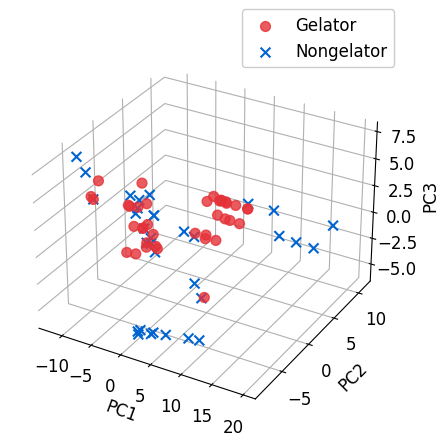

In [17]:
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_4175.loc[PCA_4175["Hydrogel-forming ability"] == "Gelator"]
nogel_pca=PCA_4175.loc[PCA_4175["Hydrogel-forming ability"] == "Nongelator"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelator',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Nongelator',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.8,1),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 
plt.savefig("./Original figure/Fig. 1d.png", dpi=300,format="png")
plt.show()

## Fig. 1e 

In [44]:
pca = PCA(n_components=3,random_state=0)
pca.fit(ML_data)
print(pca.explained_variance_ratio_)  
print(pca.explained_variance_)  
print(pca.n_features_)
print(pca.n_features_in_)

[0.35123177 0.16126742 0.10588779]
[1.00705411 0.46238706 0.30360218]
40
40


In [21]:
newdf = pca.fit_transform(ML_data)
PCA_40=pd.DataFrame(newdf)
PCA_40.columns=["PCA1","PCA2","PCA3"]
PCA_40.index=Raw_data.index
PCA_40['Hydrogel-forming ability']=Raw_data['Hydrogel-forming ability']
PCA_40.to_csv("./Results/Figs/Fig. 1e.csv",sep=',')
PCA_40.head()

,PCA1,PCA2,PCA3,Hydrogel-forming ability
ID,,,,
Ma_2019_A,0.060760,-0.787136,-0.443432,Gelator
Ma_2019_U,0.251264,0.889912,-0.977342,Gelator
Ma_2019_C,0.877747,-0.234788,-0.955000,Gelator
Ma_2019_G,-0.413796,-0.353141,-0.096510,Gelator
Ma_2019_dA,0.128364,-0.699121,-0.541369,Gelator


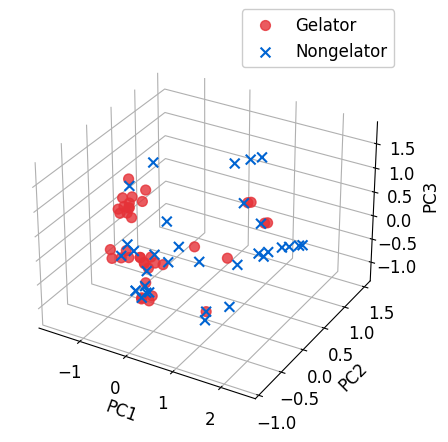

In [22]:
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_40.loc[PCA_40["Hydrogel-forming ability"] == "Gelator"]
nogel_pca=PCA_40.loc[PCA_40["Hydrogel-forming ability"] == "Nongelator"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelator',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Nongelator',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.8,1),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 
plt.savefig("./Original figure/Fig. 1e.png", dpi=300,format="png")
plt.show()

# Figure 2 (2a -2e)

## Fig. 2a

In [8]:
#descriptors results
def Desc_results(Method,Model_data):
    Model_data_AR= []
    Model=["Model 1","Model 2","Model 3","Model 4"]
    for i in Model:
        M=Model_data.xs(i, level='Model',axis= 1)
        Accuracy_test=np.array(M.loc[M.index == "Accuracy_test"])
        Roc_auc=np.array(M.loc[M.index == "Roc_auc"])
        Model_AR=(Accuracy_test[0],Roc_auc[0])
        Model_AR=[y for x in Model_AR for y in x]
        Model_AR= np.append(Model_AR,i)
        Model_data_AR.append(Model_AR)
        Model_data_last=pd.DataFrame(Model_data_AR)
        Model_data_last.columns=['Accuracy_mean','Accuracy_se','Roc_mean','Roc_se','Model']   
    Model_data_last['Method']=Method
    return Model_data_last

In [9]:
LR_model_data=pd.read_csv('./Results/LR_model_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)
RF_model_data=pd.read_csv('./Results/RF_model_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)
DT_model_data=pd.read_csv('./Results/DT_model_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)
XGB_model_data=pd.read_csv('./Results/XGB_model_data.csv',encoding='utf-8',header=[0,1,2],index_col=0)

In [10]:
LR_data=Desc_results("Logistic regression",LR_model_data)
RF_data=Desc_results("Random forest",RF_model_data)
DT_data=Desc_results("Decision tree",DT_model_data)
XGB_data=Desc_results("Extreme gradient boosting",XGB_model_data)

In [11]:
Model_data_desc=pd.concat([LR_data,RF_data,DT_data,XGB_data],axis=0)
Model_data_desc

,Accuracy_mean,Accuracy_se,Roc_mean,Roc_se,Model,Method
0,0.6567619047619049,0.0161870248422194,0.6614540816326532,0.019903361417071,Model 1,Logistic regression
1,0.6829523809523811,0.0152149168957679,0.8029804421768708,0.0158111977022753,Model 2,Logistic regression
2,0.7026666666666667,0.0117349102218053,0.8065561224489798,0.0168480933821358,Model 3,Logistic regression
3,0.7098095238095239,0.012400285272119,0.840735544217687,0.015983295593123,Model 4,Logistic regression
0,0.6251428571428571,0.0143364432633124,0.7226913265306123,0.0179492595013393,Model 1,Random forest
1,0.6686666666666667,0.0139932539626273,0.7512670068027212,0.0160589373946061,Model 2,Random forest
2,0.6717142857142856,0.0133104633793925,0.7373129251700681,0.0163325687264899,Model 3,Random forest
3,0.6744761904761905,0.013051970077444,0.7454336734693879,0.0152925963477194,Model 4,Random forest
0,0.6535238095238094,0.0149068521278911,0.6541241496598639,0.0156396496412783,Model 1,Decision tree
1,0.6371428571428571,0.0144956010216752,0.6368069727891157,0.014151996586083,Model 2,Decision tree


In [12]:
df=pd.concat([Model_data_desc], axis=0)
df['Accuracy_mean']=round(df['Accuracy_mean'].fillna(0).apply(pd.to_numeric), 4)
df['Accuracy_se']=round(df['Accuracy_se'].fillna(0).apply(pd.to_numeric), 4)
df['Roc_mean']=round(df['Roc_mean'].fillna(0).apply(pd.to_numeric), 4)
df['Roc_se']=round(df['Roc_se'].fillna(0).apply(pd.to_numeric), 4)
df.to_csv("./Results/Figs/Fig. 2a.csv",sep=',')
df

,Accuracy_mean,Accuracy_se,Roc_mean,Roc_se,Model,Method
0,0.6568,0.0162,0.6615,0.0199,Model 1,Logistic regression
1,0.6830,0.0152,0.8030,0.0158,Model 2,Logistic regression
2,0.7027,0.0117,0.8066,0.0168,Model 3,Logistic regression
3,0.7098,0.0124,0.8407,0.0160,Model 4,Logistic regression
0,0.6251,0.0143,0.7227,0.0179,Model 1,Random forest
1,0.6687,0.0140,0.7513,0.0161,Model 2,Random forest
2,0.6717,0.0133,0.7373,0.0163,Model 3,Random forest
3,0.6745,0.0131,0.7454,0.0153,Model 4,Random forest
0,0.6535,0.0149,0.6541,0.0156,Model 1,Decision tree
1,0.6371,0.0145,0.6368,0.0142,Model 2,Decision tree


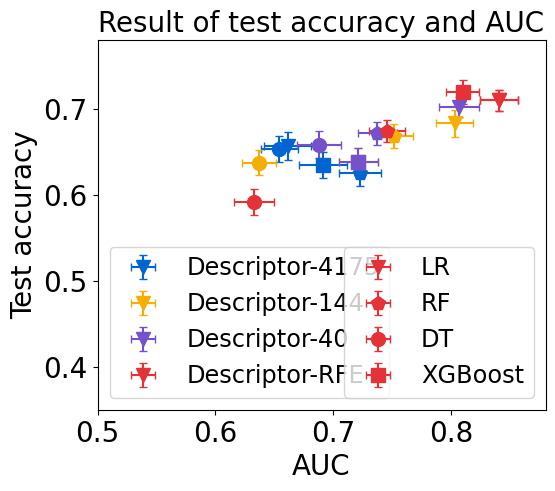

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5, 0.88], ylim=[0.35, 0.78])
plt.xlabel('AUC',fontsize = 20)
plt.ylabel('Test accuracy',fontsize = 20)
plt.title('Result of test accuracy and AUC',fontsize = 20)
plt.tick_params(labelsize=20) 
plt.rcParams['figure.figsize'] = (10, 8) 
dfa=df.loc[df["Method"] == "Logistic regression"]
df11=dfa.loc[dfa["Model"] == "Model 1"]
df12=dfa.loc[dfa["Model"] == "Model 2"]
df13=dfa.loc[dfa["Model"] == "Model 3"]
df14=dfa.loc[dfa["Model"] == "Model 4"]


dfb=df.loc[df["Method"] == "Random forest"]
df21=dfb.loc[dfb["Model"] == "Model 1"]
df22=dfb.loc[dfb["Model"] == "Model 2"]
df23=dfb.loc[dfb["Model"] == "Model 3"]
df24=dfb.loc[dfb["Model"] == "Model 4"]

dfc=df.loc[df["Method"] == "Decision tree"]
df31=dfc.loc[dfc["Model"] == "Model 1"]
df32=dfc.loc[dfc["Model"] == "Model 2"]
df33=dfc.loc[dfc["Model"] == "Model 3"]
df34=dfc.loc[dfc["Model"] == "Model 4"]


dfd=df.loc[df["Method"] == "Extreme gradient boosting"]
df41=dfd.loc[dfd["Model"] == "Model 1"]
df42=dfd.loc[dfd["Model"] == "Model 2"]
df43=dfd.loc[dfd["Model"] == "Model 3"]
df44=dfd.loc[dfd["Model"] == "Model 4"]


#LogisticRegression
pe11=plt.errorbar(y=df11['Accuracy_mean'], yerr=df11['Accuracy_se'],x=df11['Roc_mean'], xerr=df11['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#0064d2", mec="#0064d2", ecolor="#0064d2")
pe12=plt.errorbar(y=df12['Accuracy_mean'], yerr=df12['Accuracy_se'],x=df12['Roc_mean'], xerr=df12['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#f5af02", mec="#f5af02", ecolor="#f5af02")
pe13=plt.errorbar(y=df13['Accuracy_mean'], yerr=df13['Accuracy_se'],x=df13['Roc_mean'], xerr=df13['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc')

#RandomForest
pe21=plt.errorbar(y=df21['Accuracy_mean'], yerr=df21['Accuracy_se'],x=df21['Roc_mean'], xerr=df21['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#0064d2", mec="#0064d2", ecolor="#0064d2")
pe22=plt.errorbar(y=df22['Accuracy_mean'], yerr=df22['Accuracy_se'],x=df22['Roc_mean'], xerr=df22['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#f5af02", mec="#f5af02", ecolor="#f5af02")
pe23=plt.errorbar(y=df23['Accuracy_mean'], yerr=df23['Accuracy_se'],x=df23['Roc_mean'], xerr=df23['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc')

#DecisionTree
pe31=plt.errorbar(y=df31['Accuracy_mean'], yerr=df31['Accuracy_se'],x=df31['Roc_mean'], xerr=df31['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#0064d2", mec="#0064d2", ecolor="#0064d2")
pe32=plt.errorbar(y=df32['Accuracy_mean'], yerr=df32['Accuracy_se'],x=df32['Roc_mean'], xerr=df32['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#f5af02", mec="#f5af02", ecolor="#f5af02")
pe33=plt.errorbar(y=df33['Accuracy_mean'], yerr=df33['Accuracy_se'],x=df33['Roc_mean'], xerr=df33['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc')

#XGBoost
pe41=plt.errorbar(y=df41['Accuracy_mean'], yerr=df41['Accuracy_se'],x=df41['Roc_mean'], xerr=df41['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#0064d2", mec="#0064d2", ecolor="#0064d2")
pe42=plt.errorbar(y=df42['Accuracy_mean'], yerr=df42['Accuracy_se'],x=df42['Roc_mean'], xerr=df42['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#f5af02", mec="#f5af02", ecolor="#f5af02")
pe43=plt.errorbar(y=df43['Accuracy_mean'], yerr=df43['Accuracy_se'],x=df43['Roc_mean'], xerr=df43['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc')

#Descripter-last
pe14_1=plt.errorbar(y=df14['Accuracy_mean'], yerr=df14['Accuracy_se'],x=df14['Roc_mean'], xerr=df14['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#e53238", mec="#e53238", ecolor="#e53238",label="Descripter-16")
pe14_2=plt.errorbar(y=df14['Accuracy_mean'], yerr=df14['Accuracy_se'],x=df14['Roc_mean'], xerr=df14['Roc_se'],fmt='v', alpha=1,
             capsize=3, markersize=10, mfc="#e53238", mec="#e53238", ecolor="#e53238",label="Logistic")
pe24=plt.errorbar(y=df24['Accuracy_mean'], yerr=df24['Accuracy_se'],x=df24['Roc_mean'], xerr=df24['Roc_se'],fmt='p', alpha=1,
             capsize=3, markersize=10, mfc="#e53238", mec="#e53238", ecolor="#e53238",label="KNeighbors")
pe34=plt.errorbar(y=df34['Accuracy_mean'], yerr=df34['Accuracy_se'],x=df34['Roc_mean'], xerr=df34['Roc_se'],fmt='o', alpha=1,
             capsize=3, markersize=10, mfc="#e53238", mec="#e53238", ecolor="#e53238",label="RandomForest")
pe44=plt.errorbar(y=df44['Accuracy_mean'], yerr=df44['Accuracy_se'],x=df44['Roc_mean'], xerr=df44['Roc_se'],fmt='s', alpha=1,
             capsize=3, markersize=10, mfc="#e53238", mec="#e53238", ecolor="#e53238",label="GradientBoosting")
handles1=[pe11,pe12,pe13,pe14_1]
labels1=["Descriptor-4175","Descriptor-144","Descriptor-40","Descriptor-RFE"]
handles2=[pe14_2,pe24,pe34,pe44]
labels2=["LR","RF","DT","XGBoost"]
l1=plt.legend(handles1, labels1,loc="lower left",fontsize='xx-large')
l2=plt.legend(handles2, labels2,loc="lower right",fontsize='xx-large')
plt.gca().add_artist(l1)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig("./Original figure/Fig. 2a.svg", dpi=300,format="svg")
plt.show()

## Fig. 2b

In [14]:
#descriptors results
def M4_results(Method,Model_data):
    M=Model_data.xs("Model 4", level='Model',axis= 1)
    Accuracy_test=np.array(M.loc[M.index == "Accuracy_test"])
    Roc_auc=np.array(M.loc[M.index == "Roc_auc"])
    Precision=np.array(M.loc[M.index == "Precision"])
    Recall=np.array(M.loc[M.index == "Recall"])
    F1_Score=np.array(M.loc[M.index == "F1 Score"])
    Model_AR=(Accuracy_test[0],F1_Score[0],Precision[0],Recall[0],Roc_auc[0])
    Model_data_last=pd.DataFrame(Model_AR)
    Model_data_last.columns=['Mean','Se']  
    Model_data_last['Label']=['Accuracy','F1 Score','Precision','Recall','AUC']
    Model_data_last['Method']=Method
    return Model_data_last


In [15]:
LR_M4=M4_results("Logistic regression",LR_model_data)
RF_M4=M4_results("Random forest",RF_model_data)
DT_M4=M4_results("Decision tree",DT_model_data)
XGB_M4=M4_results("Extreme gradient boosting",XGB_model_data)
Model_data_M4=pd.concat([LR_M4,RF_M4,DT_M4,XGB_M4],axis=0)
Model_data_M4["X"]=[1,1.5,2,2.5,3,
                    6,6.5,7,7.5,8,
                    11,11.5,12,12.5,13,
                    16,16.5,17,17.5,18]
df=Model_data_M4
df.to_csv("./Results/Figs/Fig. 2b.csv",sep=',')
df

,Mean,Se,Label,Method,X
0,0.709810,0.012400,Accuracy,Logistic regression,1.0
1,0.779298,0.008767,F1 Score,Logistic regression,1.5
2,0.664975,0.011021,Precision,Logistic regression,2.0
3,0.950714,0.010234,Recall,Logistic regression,2.5
4,0.840736,0.015983,AUC,Logistic regression,3.0
0,0.674476,0.013052,Accuracy,Random forest,6.0
1,0.707687,0.012173,F1 Score,Random forest,6.5
2,0.691728,0.014907,Precision,Random forest,7.0
3,0.751071,0.021053,Recall,Random forest,7.5
4,0.745434,0.015293,AUC,Random forest,8.0


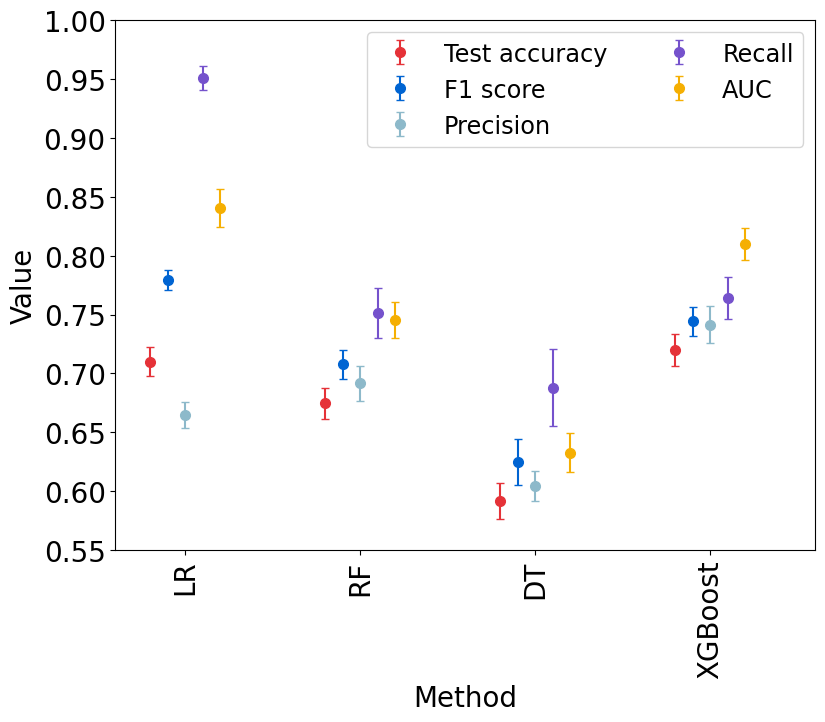

In [16]:
plt.rcParams['figure.figsize'] = (10, 10) 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0,20], ylim=[0.55, 1])
plt.xlabel('Method',fontsize = 20)
plt.ylabel('Value',fontsize = 20)
plt.tick_params(labelsize=20) 
df1=df.loc[df["Label"] == "Accuracy"]
df2=df.loc[df["Label"] == "F1 Score"]
df3=df.loc[df["Label"] == "Precision"]
df4=df.loc[df["Label"] == "Recall"]
df5=df.loc[df["Label"] == "AUC"]

pe1=plt.errorbar(y=df1['Mean'], yerr=df1['Se'],x=df1['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#e53238", mec="#e53238", ecolor='#e53238',label="Accuracy")
pe2=plt.errorbar(y=df2['Mean'], yerr=df2['Se'],x=df2['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#0064d2", mec="#0064d2", ecolor='#0064d2',label="F1 score")
pe3=plt.errorbar(y=df3['Mean'], yerr=df3['Se'],x=df3['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#8db9ca", mec="#8db9ca", ecolor='#8db9ca',label="Precision")
pe4=plt.errorbar(y=df4['Mean'], yerr=df4['Se'],x=df4['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#7552cc", mec="#7552cc", ecolor='#7552cc',label="Recall")
pe5=plt.errorbar(y=df5['Mean'], yerr=df5['Se'],x=df5['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#f5af02", mec="#f5af02", ecolor='#f5af02',label="AUC")
labels=["Test accuracy","F1 score","Precision","Recall","AUC"]
handles=[pe1,pe2,pe3,pe4,pe5]
l1=plt.legend(handles, labels,loc="upper right",fontsize='xx-large',ncol=2)
xData = [2, 7, 12,17]
xLim= ["LR","RF","DT","XGBoost"]
plt.xticks(xData,xLim)
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(left=0.2,bottom=0.35)
plt.savefig("./Original figure/Fig. 2b.svg", dpi=300,format="svg")
plt.show()

## Fig. 2c

In [17]:
LogReg= joblib.load(filename='./Models/LogReg.pkl')
RF= joblib.load(filename='./Models/RF.pkl')
XGB= joblib.load(filename='./Models/XGB.pkl')
DT= joblib.load(filename='./Models/DT.pkl')
cv= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

In [18]:
X_LR=np.array(pd.read_csv("./Results/data_lr.csv",sep=',',header=0,index_col=0))
X_RF=np.array(pd.read_csv("./Results/data_rf.csv",sep=',',header=0,index_col=0))
X_DT=np.array(pd.read_csv("./Results/data_dt.csv",sep=',',header=0,index_col=0))
X_XGB=np.array(pd.read_csv("./Results/data_xgb.csv",sep=',',header=0,index_col=0))
Raw_data = pd.read_csv('./Original data/Raw_data.csv',index_col=0)
Raw_data['Hydrogel-forming ability']=np.where(Raw_data['Hydrogel-forming ability']=='Gelator', 1, 0)
y=Raw_data['Hydrogel-forming ability'].values

In [19]:
tprs1 = []
aucs1 = []
tprs2 = []
aucs2 = []
tprs3 = []
aucs3 = []
tprs4 = []
aucs4 = []
mean_fpr1 = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X_LR, y)):
    LogReg.fit(np.array(X_LR[train]), np.array(y[train]))
    viz1 = RocCurveDisplay.from_estimator(
        LogReg,
        X_LR[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=2,
        ax=ax,
    )
    interp_tpr1 = np.interp(mean_fpr1, viz1.fpr, viz1.tpr)
    interp_tpr1[0] = 0.0
    tprs1.append(interp_tpr1)
    aucs1.append(viz1.roc_auc)
    
mean_fpr2 = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X_RF, y)):
    RF.fit(np.array(X_RF[train]), np.array(y[train]))
    viz2 = RocCurveDisplay.from_estimator(
        RF,
        X_RF[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=2,
        ax=ax,
    )
    interp_tpr2 = np.interp(mean_fpr2, viz2.fpr, viz2.tpr)
    interp_tpr2[0] = 0.0
    tprs2.append(interp_tpr2)
    aucs2.append(viz2.roc_auc)
    
    mean_fpr3 = np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X_DT, y)):
    XGB.fit(np.array(X_DT[train]), np.array(y[train]))
    viz3 = RocCurveDisplay.from_estimator(
        XGB,
        X_DT[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=2,
        ax=ax,
    )
    interp_tpr3 = np.interp(mean_fpr3, viz3.fpr, viz3.tpr)
    interp_tpr3[0] = 0.0
    tprs3.append(interp_tpr3)
    aucs3.append(viz3.roc_auc)
    
    mean_fpr4= np.linspace(0, 1, 100)
for i, (train, test) in enumerate(cv.split(X_XGB, y)):
    DT.fit(np.array(X_XGB[train]), np.array(y[train]))
    viz4 = RocCurveDisplay.from_estimator(
        DT,
        X_XGB[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=2,
        ax=ax,
    )
    interp_tpr4 = np.interp(mean_fpr4, viz4.fpr, viz4.tpr)
    interp_tpr4[0] = 0.0
    tprs4.append(interp_tpr4)
    aucs4.append(viz4.roc_auc)    


In [20]:
mean_tpr1 = np.mean(tprs1, axis=0)
mean_tpr1[-1] = 1.0
mean_auc1 = auc(mean_fpr1, mean_tpr1)
std_auc1 = np.std(aucs1)/math.sqrt(len(aucs1))

mean_tpr2 = np.mean(tprs2, axis=0)
mean_tpr2[-1] = 1.0
mean_auc2 = auc(mean_fpr2, mean_tpr2)
std_auc2 = np.std(aucs2)/math.sqrt(len(aucs2))

mean_tpr3 = np.mean(tprs3, axis=0)
mean_tpr3[-1] = 1.0
mean_auc3 = auc(mean_fpr3, mean_tpr3)
std_auc3 = np.std(aucs3)/math.sqrt(len(aucs3))

mean_tpr4 = np.mean(tprs4, axis=0)
mean_tpr4[-1] = 1.0
mean_auc4 = auc(mean_fpr4, mean_tpr4)
std_auc4 = np.std(aucs3)/math.sqrt(len(aucs4))

In [21]:
AUC=pd.DataFrame(mean_fpr1)
AUC.columns=["fpr-LR"]
AUC['tpr-LR']=mean_tpr1
AUC['tpr-RF']=mean_tpr2
AUC['tpr-RF']=mean_fpr2
AUC['tpr-DT']=mean_fpr3
AUC['tpr-DT']=mean_tpr3
AUC['tpr-XGB']=mean_fpr4
AUC['tpr-XGB']=mean_tpr4
AUC.to_csv("./Results/Figs/Fig. 2c.csv",sep=',')
AUC

,fpr-LR,tpr-LR,tpr-RF,tpr-DT,tpr-XGB
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.010101,0.554643,0.010101,0.288929,0.070895
2,0.020202,0.554643,0.020202,0.288929,0.087147
3,0.030303,0.554643,0.030303,0.288929,0.103399
4,0.040404,0.554643,0.040404,0.288929,0.119651
...,...,...,...,...,...
95,0.959596,0.996894,0.959596,0.984643,0.971338
96,0.969697,0.997045,0.969697,0.984643,0.976450
97,0.979798,0.997197,0.979798,0.984643,0.981562
98,0.989899,0.997348,0.989899,0.984643,0.986674


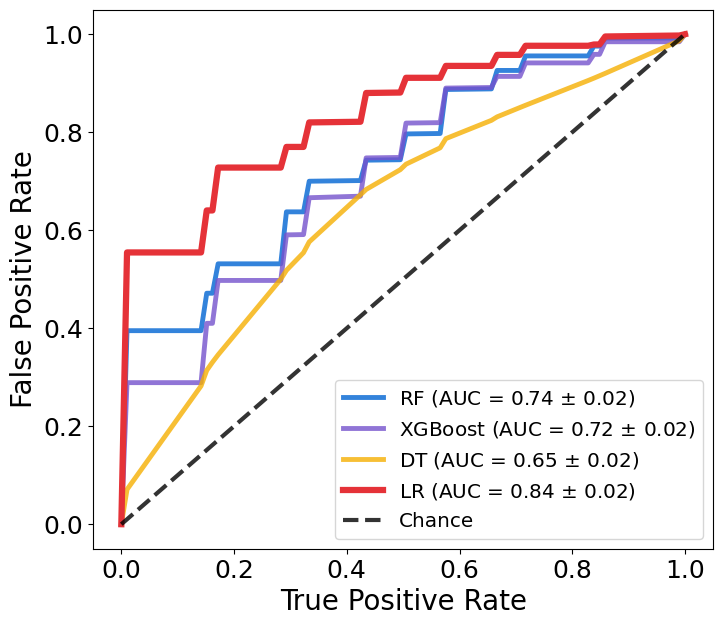

In [22]:
plt.rcParams['figure.figsize'] = (8, 7) 
fig, ax = plt.subplots()
plt.xlabel('True Positive Rate',fontsize = 20)
plt.ylabel('False Positive Rate',fontsize = 20)
plt.tick_params(labelsize=18) 
ax.plot(mean_fpr2, mean_tpr2,color="#0064d2",label=r"RF (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc2, std_auc2),lw=3.5,alpha=0.8)
ax.plot(mean_fpr3, mean_tpr3,color="#7552cc",label=r"XGBoost (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc3, std_auc3),lw=3.5,alpha=0.8)
ax.plot(mean_fpr4, mean_tpr4,color="#f5af02",label=r"DT (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc4, std_auc4),lw=3.5,alpha=0.8)
ax.plot(mean_fpr1, mean_tpr1,color="#e53238",label=r"LR (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc1, std_auc1),lw=4.5,alpha=1)
ax.plot([0, 1], [0, 1], linestyle="--", lw=3, color="black", label="Chance", alpha=0.8)
ax.legend(loc="lower right",fontsize='x-large')
plt.savefig("./Original figure/Fig. 2c.svg", dpi=300,format="svg")
plt.show()

## Fig. 2d

In [33]:
df=pd.read_csv("./Results/test_score.csv",sep=',',header=0,index_col=0)
df.to_csv("./Results/Figs/Fig. 2d.csv",sep=',')
df.head()

,Mean,Se,X
0,0.678762,0.013977,5
1,0.683048,0.014358,6
2,0.681524,0.015693,7
3,0.678571,0.015039,8
4,0.687048,0.014835,9


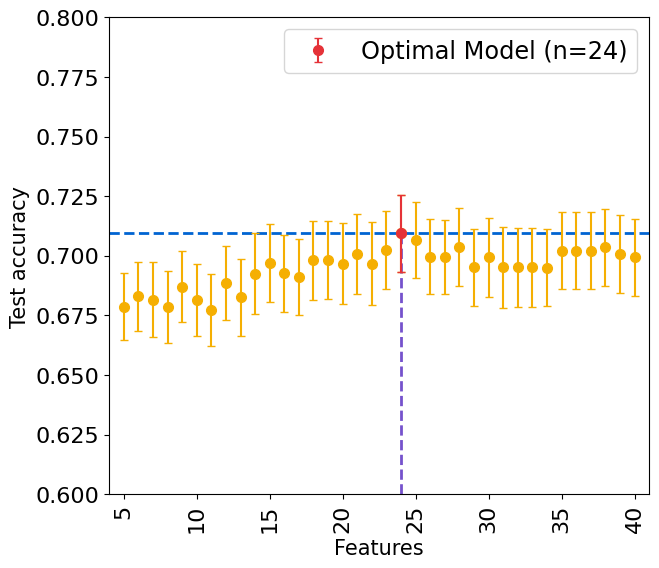

In [34]:
plt.rcParams['figure.figsize'] = (9, 9) 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[4,41], ylim=[0.6, 0.8])
plt.xlabel('Features',fontsize = 15)
plt.ylabel('Test accuracy',fontsize = 15)
plt.tick_params(labelsize=16) 
df1=df.loc[df["X"] == 24]
plt.axhline(y=0.709429, 
            c="#0064d2",
            linestyle='--',
            linewidth=2,
            markerfacecolor='w',
            markersize=10,
         )
plt.axvline(x=24, 
            #xmin=0.2,
            ymax=0.55,
            c="#7552cc",
            linestyle='--',
            linewidth=2,
            markerfacecolor='w',
            markersize=10,
         )
pe5=plt.errorbar(y=df['Mean'], yerr=df['Se'],x=df['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#f5af02", mec="#f5af02", ecolor='#f5af02',label="AUC")
pe1=plt.errorbar(y=df1['Mean'], yerr=df1['Se'],x=df1['X'], fmt='o', alpha=1,
             capsize=3, markersize=7, mfc="#e53238", mec="#e53238", ecolor='#e53238',label="Accuracy")
labels=["Optimal Model (n=24)"]
handles=[pe1]
l1=plt.legend(handles, labels,loc="upper right",fontsize='xx-large',ncol=3)
plt.xticks(rotation=90)
plt.gcf().subplots_adjust(left=0.3,bottom=0.35)
plt.savefig("./Original figure/Fig. 2d.svg", dpi=300,format="svg")
plt.show()

## Fig. 2e

In [37]:
LogReg= joblib.load(filename='./Models/LogReg.pkl')

In [38]:
ML_data= pd.read_csv("./Results/data_lr.csv",sep=',')

In [39]:
LogReg_coef=pd.DataFrame(LogReg.coef_)
LogReg_coef.columns=ML_data.columns[1:25]
LogReg_coef.index=["coef"]

In [40]:
LR_coef=LogReg_coef.T
LR_coef['index']=LR_coef.index
LR_coef=LR_coef.sort_values(by='coef',ascending=False)
LR_coef.to_csv("./Results/Figs/Fig. 2e.csv",sep=',')
LR_coef.head()

,coef,index
B09[O-O],0.155378,B09[O-O]
nN(CO)2,0.131059,nN(CO)2
F05[N-N],0.092150,F05[N-N]
F07[N-O],0.085388,F07[N-O]
GATS7s,0.077402,GATS7s


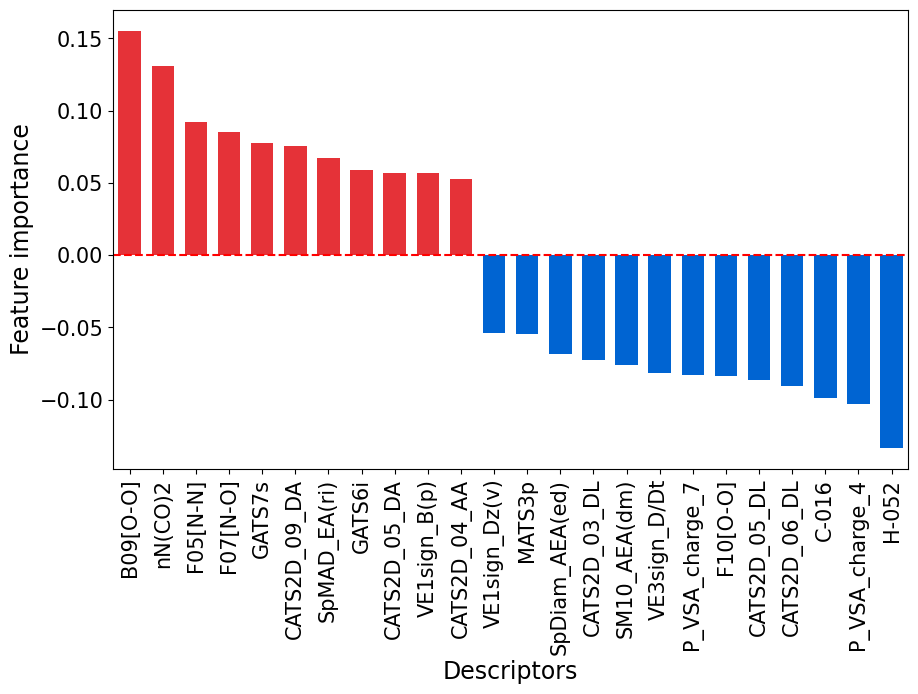

In [41]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (14, 6) 
plt.xlim(-0.50,23.5) 
plt.bar(range(0,24),LR_coef['coef'],color=11*["#e53238"]+13*["#0064d2"],width=0.68)
plt.tick_params(labelsize=15) 
ax.set_ylabel("Feature importance",fontsize = 17)
plt.xticks(rotation=90)
xLim= LR_coef.index
plt.xlabel('Descriptors',fontsize = 17)
fig.tight_layout()
plt.axhline(y=0,ls="--",c="red")
plt.gcf().subplots_adjust(bottom=0.35)
xticks = range(24)
xticklabels = LR_coef.index
plt.xticks(xticks, xticklabels)
plt.gcf().subplots_adjust(left=0.1,top=0.91,bottom=0.4) 
plt.savefig("./Original figure/Fig. 2e.svg", dpi=600,format="svg")
plt.show()

# Figure 3 (3a) & Fig. S12

In [149]:
result=pd.read_csv("./Results/Supplementary Data S7.csv",sep=',',header=0,index_col=0)
result=pd.DataFrame(result)
result=result.sort_values(by=['Probability of gelator'],ascending=True)
result["rank"]=list(range(1,len(result)+1))
result['%']=result["rank"]/7257
result['%']=result['%'].round(3)
result.to_csv("./Results/Figs/Supplementary Fig. 12.csv",sep=',')
result['cid']=result.index
result

,Probability of nongelator,Probability of gelator,rank,%,cid
cid,,,,,
84015621,0.764249,0.235751,1,0.000,84015621
1838,0.759125,0.240875,2,0.000,1838
42553033,0.736183,0.263817,3,0.000,42553033
42553032,0.736183,0.263817,4,0.001,42553032
71832128,0.736183,0.263817,5,0.001,71832128
...,...,...,...,...,...
293725,0.340278,0.659722,7253,0.999,293725
131876227,0.323628,0.676372,7254,1.000,131876227
21826754,0.319758,0.680242,7255,1.000,21826754


In [150]:
#top 10%
resultX1=result.loc[result["cid"] ==21826754]
resultX2=result.loc[result["cid"] ==77518952]
resultX3=result.loc[result["cid"] ==135398631]
resultX4=result.loc[result["cid"] ==135398640]
resultX5=result.loc[result["cid"] ==9427]
resultX6=result.loc[result["cid"] ==135596592]
resultX7=result.loc[result["cid"] ==135518164]
resultX8=result.loc[result["cid"] ==135407175]
resultX9=result.loc[result["cid"] ==135763231]
resultX10=result.loc[result["cid"] ==13542524]
resultX11=result.loc[result["cid"] ==135491415]
resultX12=result.loc[result["cid"] ==136441961]

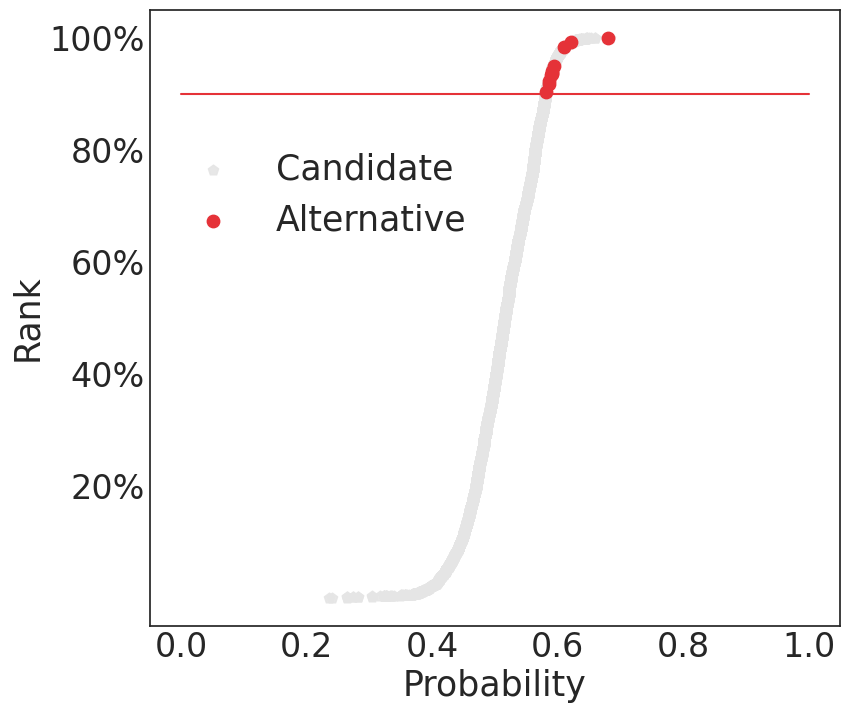

In [151]:
plt.rcParams['figure.figsize'] = (10, 8) 
fig = plt.figure(1)
x = [0,1]
y = [len(result)*0.90/7257,len(result)*0.90/7257]
P11=plt.plot(x,y,color='#e53238')
P1=plt.scatter(result['Probability of gelator'], result['%'],  alpha=0.9, marker='p', color="#e5e5e5",s=60)
P2=plt.scatter(resultX1['Probability of gelator'],resultX1['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P3=plt.scatter(resultX2['Probability of gelator'],resultX2['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P4=plt.scatter(resultX3['Probability of gelator'],resultX3['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P2=plt.scatter(resultX4['Probability of gelator'],resultX4['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P3=plt.scatter(resultX5['Probability of gelator'],resultX5['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P4=plt.scatter(resultX6['Probability of gelator'],resultX6['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P2=plt.scatter(resultX7['Probability of gelator'],resultX7['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P3=plt.scatter(resultX8['Probability of gelator'],resultX8['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P4=plt.scatter(resultX9['Probability of gelator'],resultX9['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P3=plt.scatter(resultX10['Probability of gelator'],resultX10['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P4=plt.scatter(resultX11['Probability of gelator'],resultX11['%'] ,  alpha=1, marker='o', color="#e53238",s=80)
P4=plt.scatter(resultX12['Probability of gelator'],resultX12['%'] ,  alpha=1, marker='o', color="#e53238",s=80)

plt.xlabel('Probability',fontsize = 25)
yData = [0.2,0.4, 0.6, 0.8,1.0]
yLim= ["20%","40%","60%","80%","100%"]
plt.yticks(yData,yLim)
plt.ylabel('Rank',fontsize = 25)
plt.tick_params(labelsize=24) 
l1=plt.legend(P11, ['Top 10%'], loc="lower right",scatterpoints=1,fontsize='large')
l3=plt.legend([P1,P2], ['Candidate', 'Alternative'],bbox_to_anchor=(0.25,0.7),loc=10,scatterpoints=1,fontsize = 25)
#plt.gca().add_artist(l1)

plt.gcf().subplots_adjust(left=0.21)
plt.savefig("./Original figure/Fig. S11.svg", dpi=300,format="svg")
plt.show()

In [152]:
data_Fig_3a = result['Probability of gelator']
x=data_Fig_3a

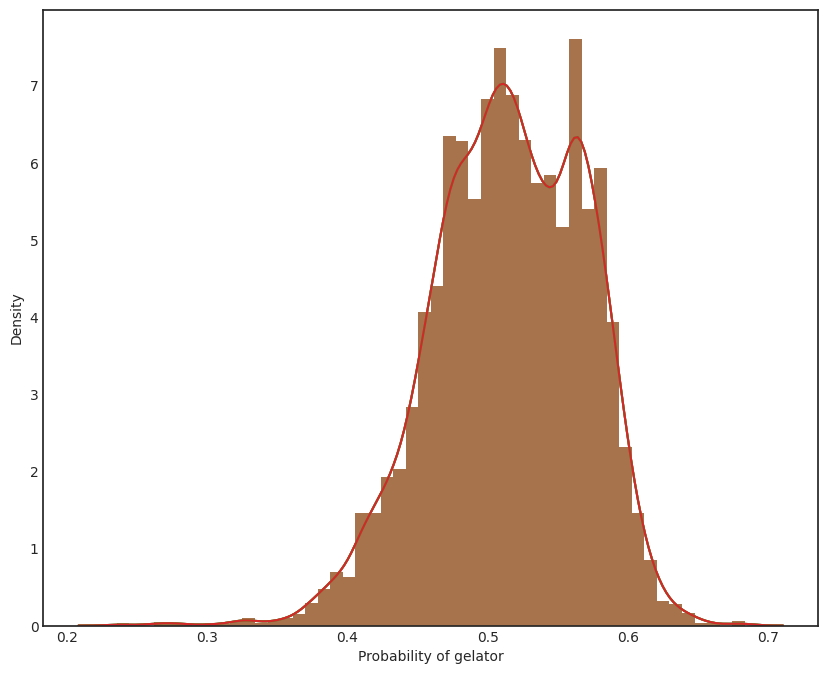

In [153]:
#Obtaining Curve Data
x1=sns.distplot(x).get_lines()[0].get_data()[0]
y1=sns.distplot(x).get_lines()[0].get_data()[1]
z1=[h.get_height() for h in sns.distplot(x).patches]
z2=[h.get_width() for h in sns.distplot(x).patches]
aa=x.quantile([0.9])
bb=x.quantile([0.1])

,0,1,2
0,0.235751,0.008056,0.030789
1,0.244702,0.008056,0.000000
2,0.253653,0.008056,0.000000
3,0.262604,0.008056,0.046184
4,0.271555,0.008056,0.030789


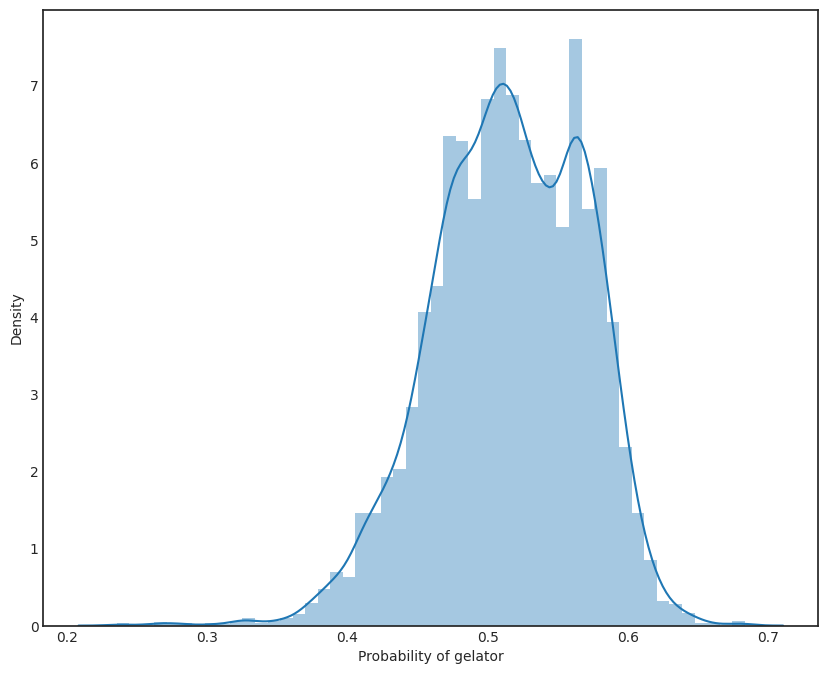

In [154]:
l =pd.DataFrame( [[h.xy[0], h.get_width()*0.9, h.get_height()] for h in sns.distplot(x).patches])
l.head()

In [155]:
l1=l[(l[0]>=0.5)&(l[0]<aa.tolist()[0])]
l2=l[l[0]<0.5]
l3=l[l[0]>=aa.tolist()[0]]
l4=l[(l[0]<0.5)&(l[0]>bb.tolist()[0])]
l5=l[l[0]<=bb.tolist()[0]]
l .columns=['Gelability','width','Density']
l .to_csv("./Results/Figs/Fig. 3a.csv",sep=',')

In [156]:
df=pd.DataFrame({'x':x1, 'y':y1})
df1=df[df["x"]<0.5]
df2=df[(df["x"]<aa.tolist()[0])&(df["x"]>=0.5)]
df3=df[df["x"]>=aa.tolist()[0]]
df4=df[(df["x"]>bb.tolist()[0])&(df["x"]>=0.5)]
df5=df[df["x"]<=bb.tolist()[0]]

In [157]:
input=0.5
d1=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(d1).tolist()[0][0]

0.501159901110855

In [158]:
input=aa.tolist()[0]
d2=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(d2).tolist()[0][0]

0.581902322697841

In [159]:
input=bb.tolist()[0]
d3=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(d3).tolist()[0][0]

0.44564948626980194

In [160]:
#DTT
input=0.680
DTT=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(DTT).tolist()[0][0]

0.6803071490069805

In [161]:
#XTS
input=0.621
XTS=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(XTS).tolist()[0][0]

0.6197503328167409

In [162]:
#GMP
input=0.610
GMP=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(GMP).tolist()[0][0]

0.6096575301183675

In [163]:
#IMP
input=0.593
IMP=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(IMP).tolist()[0][0]

0.5919951253962144

In [164]:
#5-FUR
input=0.591
FFUR=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(FFUR).tolist()[0][0]

0.5919951253962144

In [165]:
#8-AG
input=0.590
EAG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(EAG).tolist()[0][0]

0.5894719247216211

In [166]:
#dGMP
input=0.590
dGMP=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(dGMP).tolist()[0][0]

0.5894719247216211

In [167]:
#8-OHG
input=0.590
EOHG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(EOHG).tolist()[0][0]

0.5894719247216211

In [168]:
#8-AzaG
input=0.587
EAzaG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(EAzaG).tolist()[0][0]

0.5869487240470277

In [169]:
#I-5’-CA
input=0.585
IFCA=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(IFCA).tolist()[0][0]

0.5844255233724345

In [170]:
#2’-NH2-dG
input=0.585
TNHTdG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(TNHTdG).tolist()[0][0]

0.5844255233724345

In [171]:
#2’-OMe-dG
input=0.582
TOMedG=df.iloc[(df['x']-input).abs().argsort()[:1]]
np.array(TOMedG).tolist()[0][0]

0.581902322697841

In [172]:
df=pd.concat([DTT,XTS,GMP,IMP,FFUR,EAG,dGMP,EOHG,EAzaG,IFCA,TNHTdG,TOMedG])
df.index=['DTT', 'XTS','GMP','IMP','5-FUR','8-AG','dGMP','8-OHG','8-AzaG','I-5’-CA','2’-NH2-dG','2’-OMe-dG']
df.columns=['Gelability','Density']
df .to_csv("./Results/Figs/Fig. 3a2.csv",sep=',')

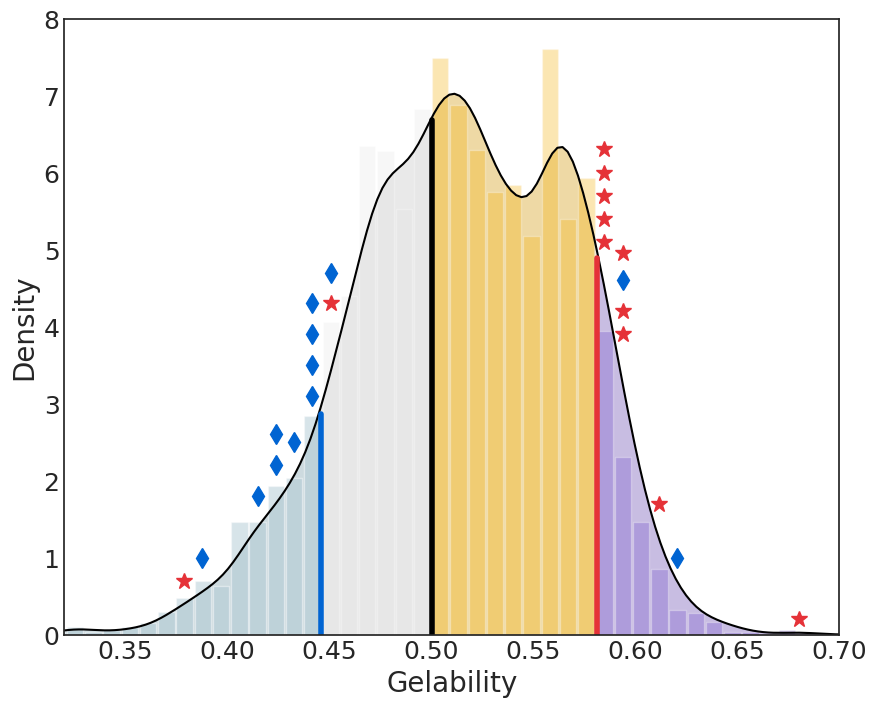

In [173]:
plt.clf()
plt.style.use('seaborn-white')
plt.cla() 
plt.close() 

fig, (ax1) = plt.subplots(1)
plt.xlim(0.32,0.7)
plt.ylim(0,8)
plt.xlabel('Gelability',fontsize = 20)
plt.ylabel('Density',fontsize = 20)
plt.tick_params(labelsize=18) 
plt.rcParams['figure.figsize'] = (16, 6) 
ax1.fill_between(x1, y1, alpha=.7, linewidth=0,color="#e5e5e5")
ax1.fill_between(df1['x'], df1['y'], alpha=0.3, linewidth=0,color="#e5e5e5")
ax1.fill_between(df2['x'], df2['y'], alpha=0.3, linewidth=0,color="#f5af02")
ax1.fill_between(df3['x'], df3['y'], alpha=0.3, linewidth=0,color='#7552cc')
ax1.fill_between(df5['x'], df5['y'], alpha=0.3, linewidth=0,color="#8db9ca")
plt.plot(x1, y1,color='black') #Density curve
plt.bar(l1[0].tolist(),l1[2].tolist(),alpha=0.3,width=l1[1].tolist(),color="#f5af02",edgecolor="white")
plt.bar(l2[0].tolist(),l2[2].tolist(),alpha=0.3,width=l2[1].tolist(),color="#e5e5e5",edgecolor="white")
plt.bar(l3[0].tolist(),l3[2].tolist(),alpha=0.3,width=l3[1].tolist(),color='#7552cc',edgecolor="white")
plt.bar(l5[0].tolist(),l5[2].tolist(),alpha=0.3,width=l5[1].tolist(),color="#8db9ca",edgecolor="white")
plt.axvline(np.array(d1).tolist()[0][0]-0.001, 0,np.array(d1).tolist()[0][1]/8-0.01,  linewidth = 4, color="black")
plt.axvline(np.array(d2).tolist()[0][0]-0.001, 0,np.array(d2).tolist()[0][1]/8,   linewidth = 4,color="#e53238")
plt.axvline(np.array(d3).tolist()[0][0], 0,np.array(d3).tolist()[0][1]/8-0.01,   linewidth = 4,color="#0064d2")
plt.plot(np.array(DTT).tolist()[0][0], 0.2,marker='*',color='#e53238', markersize=12,markerfacecolor='#e53238')

plt.plot(0.6205, 1.0,marker='d', color='#0064d2',markersize=10,markerfacecolor='#0064d2')
#
plt.plot(0.6115, 1.7, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
#
plt.plot(0.5938, 4.95, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(0.5938, 4.6, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')
plt.plot(0.5938, 4.2, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(0.5938, 3.9, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
#
plt.plot(0.5845, 6.3, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(0.5845, 6.0, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(0.5845, 5.7, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(0.5845, 5.4, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(0.5845, 5.1, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')

plt.plot(0.4505,4.3, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')
plt.plot(0.4505,4.7, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')

plt.plot(0.4415,3.1, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')
plt.plot(0.4415,3.5, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')
plt.plot(0.4415,3.9, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')
plt.plot(0.4415,4.3, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')


plt.plot(0.4328,2.5, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')

plt.plot(0.4235,2.2, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')
plt.plot(0.4235,2.6, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')

plt.plot(0.4148,1.8, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')

plt.plot(0.3875,1.0, marker='d',color='#0064d2',markersize=10, markerfacecolor='#0064d2')

plt.plot(0.3785,0.7, marker='*',color='#e53238',markersize=12, markerfacecolor='#e53238')

plt.savefig("./Original figure/Fig. 3a.svg", dpi=300,format="svg")
plt.show()

# Supplementary Figs

## Fig.S1 4175 descriptors correlation heatmaps

In [25]:
df_corr=X_scale_data.corr(method='spearman')
df_corr.to_csv("./Results/Supplementary Fig. 1.csv",sep=',')
df_corr

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
MW,1.000000,-0.504089,0.972424,0.950508,0.956019,0.942801,-0.067029,-0.609053,0.164381,-0.573571,...,NaN,NaN,0.011667,0.312427,0.970833,0.780662,0.321849,-0.740415,0.904888,0.307759
AMW,-0.504089,1.000000,-0.613521,-0.652358,-0.649753,-0.664313,0.669613,0.896722,0.246838,0.562495,...,NaN,NaN,-0.069999,0.040466,-0.580274,-0.582774,0.414975,0.853036,-0.528797,0.313585
Sv,0.972424,-0.613521,1.000000,0.987428,0.992854,0.982287,-0.150127,-0.702066,0.125567,-0.609870,...,NaN,NaN,0.035000,0.329656,0.988267,0.834370,0.270283,-0.772470,0.923368,0.270694
Se,0.950508,-0.652358,0.987428,1.000000,0.980852,0.996603,-0.238126,-0.701250,0.031920,-0.554839,...,NaN,NaN,0.023333,0.270843,0.970589,0.813035,0.219806,-0.785651,0.905266,0.217616
Sp,0.956019,-0.649753,0.992854,0.980852,1.000000,0.978898,-0.172202,-0.747390,0.138315,-0.627583,...,NaN,NaN,0.046666,0.336047,0.976050,0.842231,0.227843,-0.794875,0.917769,0.246989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s34_relSize,0.780662,-0.582774,0.834370,0.813035,0.842231,0.816782,-0.056586,-0.698852,0.250256,-0.571502,...,NaN,NaN,0.067311,0.461515,0.874074,1.000000,0.198314,-0.706782,0.929331,0.347604
s34_phSize,0.321849,0.414975,0.270283,0.219806,0.227843,0.216530,0.725380,0.170985,0.605686,-0.125756,...,NaN,NaN,0.026345,0.639383,0.317235,0.198314,1.000000,0.277142,0.355579,0.909343
s34_phRelSize,-0.740415,0.853036,-0.772470,-0.785651,-0.794875,-0.786097,0.440862,0.807099,0.050447,0.643177,...,NaN,NaN,-0.046690,-0.054667,-0.759368,-0.706782,0.277142,1.000000,-0.736526,0.165547
chiralMoment,0.904888,-0.528797,0.923368,0.905266,0.917769,0.903728,0.021725,-0.648346,0.304918,-0.605495,...,NaN,NaN,0.064323,0.484649,0.949746,0.929331,0.355579,-0.736526,1.000000,0.460666


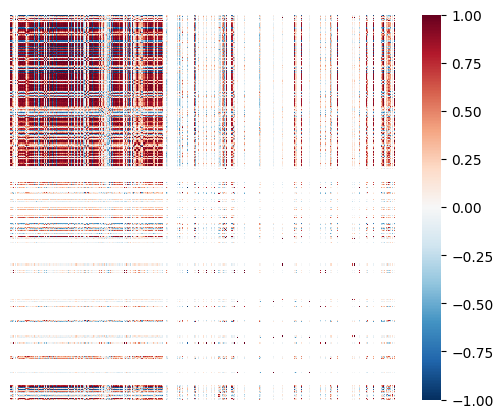

In [26]:
sns.heatmap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False, xticklabels=False, yticklabels=False)
plt.savefig('./Original figure/Fig. S1.png', dpi=300,format="png")

## Fig.S2 144 descriptors correlation heatmaps after the rank-sum test selection (P<0.05)

In [27]:
df_corr=X_scaled_data.corr(method='spearman')
df_corr
df_corr.to_csv("./Results/Figs/Supplementary Fig. S2.csv",sep=',')

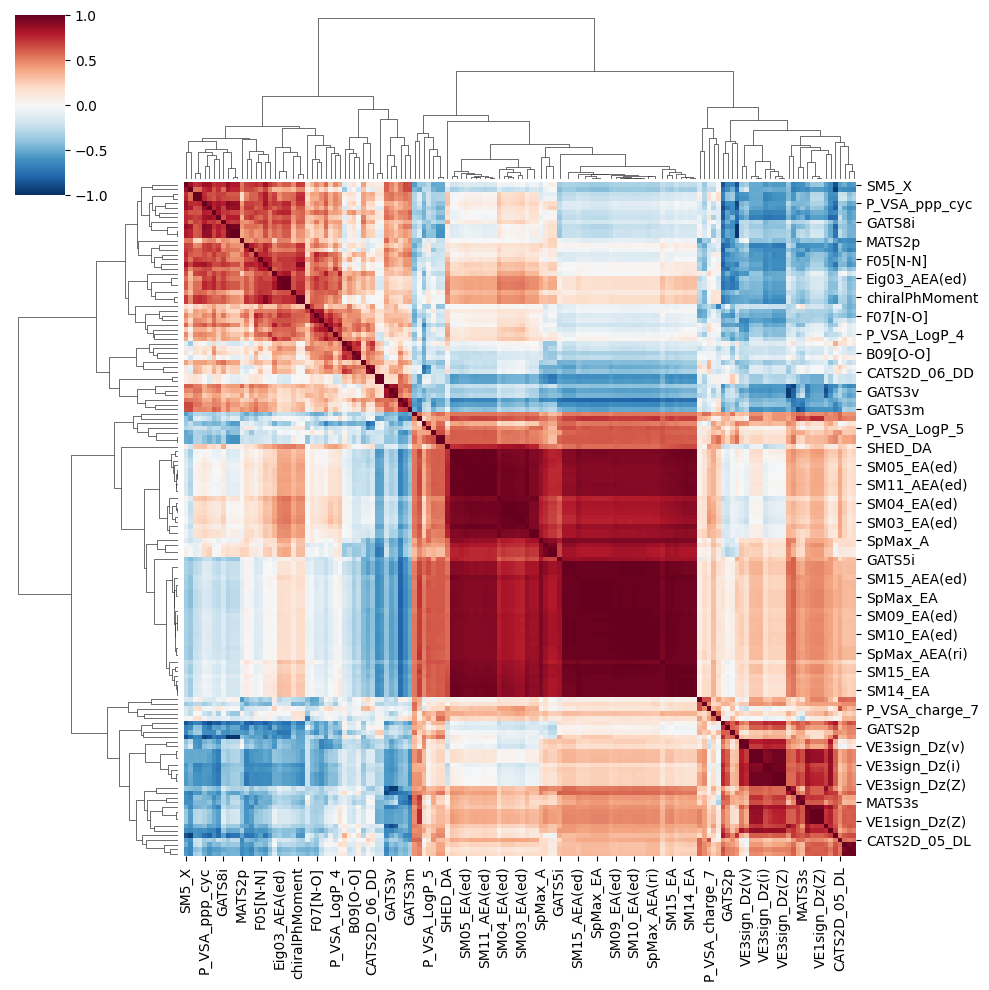

In [29]:
sns.clustermap(df_corr, square=True, vmax=1, vmin=-1, center=0, cmap='RdBu_r', annot=False)
plt.savefig('./Original figure/Fig. S2.png', dpi=300,format="png")

## Fig.S3 3D PCA of 144 descriptors. 

In [33]:
pca = PCA(n_components=3,random_state=0)
pca.fit(X_scaled_data)
newdf = pca.fit_transform(X_scaled_data)
PCA_144=pd.DataFrame(newdf)
PCA_144.columns=["PCA1","PCA2","PCA3"]
PCA_144.index=Raw_data.index
PCA_144['Hydrogel-forming ability']=Raw_data['Hydrogel-forming ability']
PCA_144.to_csv("./Results/Figs/Supplementary Fig. 3.csv",sep=',')
PCA_144.head()

,PCA1,PCA2,PCA3,Hydrogel-forming ability
ID,,,,
Ma_2019_A,-0.147911,0.037672,-1.055510,Gelator
Ma_2019_U,-1.158987,1.798780,0.163468,Gelator
Ma_2019_C,-0.748797,1.755291,-1.176458,Gelator
Ma_2019_G,-0.301994,-0.187490,-0.528063,Gelator
Ma_2019_dA,-0.662048,0.753784,-1.173629,Gelator


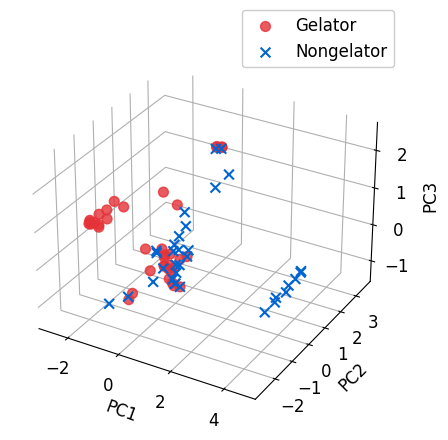

In [34]:
plt.rcParams['figure.figsize'] = (7, 5) 
plt.rcParams['axes.facecolor']='white'
ax=plt.subplot(111,projection='3d')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
gel_pca=PCA_144.loc[PCA_144["Hydrogel-forming ability"] == "Gelator"]
nogel_pca=PCA_144.loc[PCA_144["Hydrogel-forming ability"] == "Nongelator"]
ax.scatter(gel_pca['PCA1'],gel_pca["PCA2"],gel_pca["PCA3"],alpha=0.8, c="#e53238",label = 'Gelator',marker="o",s=50)
ax.scatter(nogel_pca['PCA1'],nogel_pca["PCA2"],nogel_pca["PCA3"],alpha=1,c="#0064d2", label = 'Nongelator',marker="x",s=50)
ax.legend(bbox_to_anchor=(0.8,1),loc=10,framealpha=1, fontsize=12, borderaxespad=0)
ax.set_xlabel('PC1',fontsize = 12,rotation=-20)
ax.set_ylabel('PC2',fontsize = 12,rotation=45)
ax.set_zlabel('PC3',fontsize = 12,rotation=90)
plt.tick_params(labelsize=12) 

plt.savefig("./Original figure/Fig. S3.png", dpi=300,format="png")
plt.show()

# Fig S5-S7 (Details can be found in Step 4)

In [47]:
PCA= pd.read_csv("./Results/Figs/Supplementary Fig. 5.csv",sep=',',header=0,index_col=0)

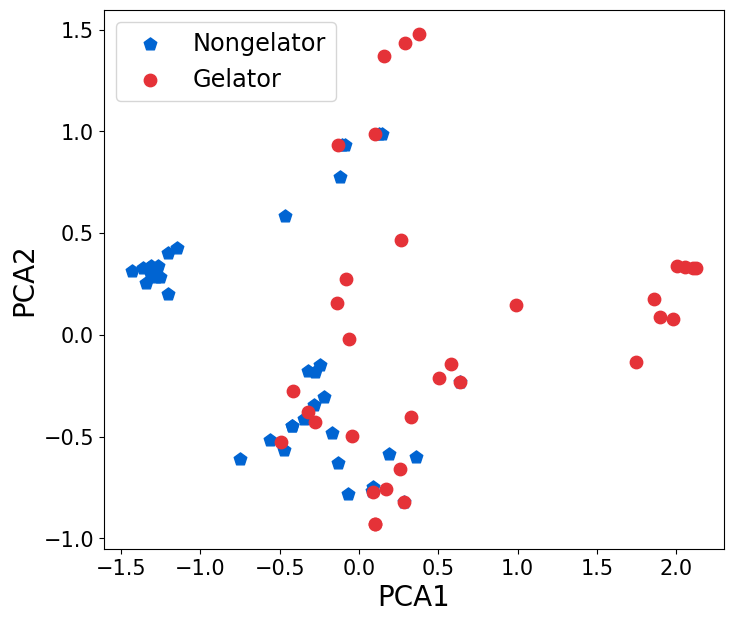

In [49]:
x1 = PCA[PCA['GEL'] == 'Gelator']
x2 = PCA[PCA['GEL'] == 'Nongelator']
plt.rcParams['figure.figsize'] = (8, 7) 
#plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1],  alpha=0.8, c = "#f5af02", marker='o', label='Pubchem')
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1],   s=90, c = "#0064d2", marker='p', label='Nongelator')
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], s=80, c = "#e53238", marker='o', label='Gelator')
plt.tick_params(labelsize=15 )
#8db9ca
plt.xlabel('PCA1',fontsize = 20)
plt.ylabel('PCA2',fontsize = 20)
plt.legend(loc=2,fontsize='xx-large')
plt.savefig("./Original figure/Fig. S5.svg", dpi=300,format="svg")
plt.show()

## Fig. S8

In [64]:
from sklearn.inspection import permutation_importance
data_lr=pd.read_csv("./Results/data_lr.csv",sep=',',header=0,index_col=0)
X_LR=np.array(data_lr)
Raw_data['Hydrogel-forming ability']=np.where(Raw_data['Hydrogel-forming ability']=='Gelator', 1, 0)
y=Raw_data['Hydrogel-forming ability'].values
LogReg= joblib.load(filename='./Models/LogReg.pkl')
columns=data_lr.columns

In [65]:
#Feature Importance
result = permutation_importance(
    LogReg, X_LR, y, n_repeats=1000, random_state=0, n_jobs=2)
clf2_importances = pd.Series(result.importances_mean, index= columns)
importances_mean=pd.DataFrame(clf2_importances, index=columns)
importances_std=pd.DataFrame(result.importances_std, index=columns)
importances_se=pd.DataFrame(result.importances_std/math.sqrt(10), index=columns)
importances_=pd.concat([importances_mean,importances_std,importances_se],axis=1)
importances_.columns=["mean","std","se"]
Feature_importance=importances_.sort_values(by="mean",ascending=True)
Feature_importance.columns=[['LogisticRegression']*3,["mean","std","se"]]
Feature_importance.columns.names=['Method','Values']
Feature_importance.to_csv('./Results/Supplementary Data S5.csv',encoding='utf-8')
Feature_importance

Method         LogisticRegression                    
Values                       mean       std        se
C-016                   -0.016056  0.020109  0.006359
H-052                   -0.009197  0.018614  0.005886
F10[O-O]                -0.008197  0.009852  0.003115
VE3sign_D/Dt            -0.006676  0.015060  0.004762
SpDiam_AEA(ed)          -0.003465  0.012274  0.003882
P_VSA_charge_4          -0.003324  0.015366  0.004859
CATS2D_05_DL            -0.000437  0.015248  0.004822
SM10_AEA(dm)             0.000268  0.012618  0.003990
CATS2D_09_DA             0.000958  0.014150  0.004475
CATS2D_06_DL             0.001549  0.016095  0.005090
GATS7s                   0.003310  0.010724  0.003391
CATS2D_03_DL             0.003789  0.010451  0.003305
VE1sign_B(p)             0.004254  0.009582  0.003030
B09[O-O]                 0.006225  0.023747  0.007509
MATS3p                   0.006239  0.009393  0.002970
SpMAD_EA(ri)             0.006901  0.010520  0.003327
VE1sign_Dz(v)            0.007113  0.009676  0.003060
F05[N-N]                 0.007197  0.016521  0.005224
P_VSA_charge_7           0.007789  0.015955  0.005045
F07[N-O]                 0.013239  0.015211  0.004810
GATS6i                   0.014859  0.009149  0.002893
CATS2D_05_DA             0.016352  0.009708  0.003070
CATS2D_04_AA             0.019746  0.008169  0.002583
nN(CO)2                  0.027028  0.015623  0.004941

In [66]:
Feature_importance.columns=['Mean','Std','Se']
Feature_importance['Descripter']=Feature_importance.index
Feature_importance['X']=range(1, len(Feature_importance["Mean"])+1)
Feature_importance['Colour']=np.where(Feature_importance['Mean']>0, 1, 0)
Feature_importance=Feature_importance.sort_values(by='Mean',ascending=False)
Feature_importance.to_csv("./Results/Figs/Supplementary Fig. 8.csv",sep=',',header=0)
Feature_importance.head()

,Mean,Std,Se,Descripter,X,Colour
nN(CO)2,0.027028,0.015623,0.004941,nN(CO)2,24,1
CATS2D_04_AA,0.019746,0.008169,0.002583,CATS2D_04_AA,23,1
CATS2D_05_DA,0.016352,0.009708,0.003070,CATS2D_05_DA,22,1
GATS6i,0.014859,0.009149,0.002893,GATS6i,21,1
F07[N-O],0.013239,0.015211,0.004810,F07[N-O],20,1


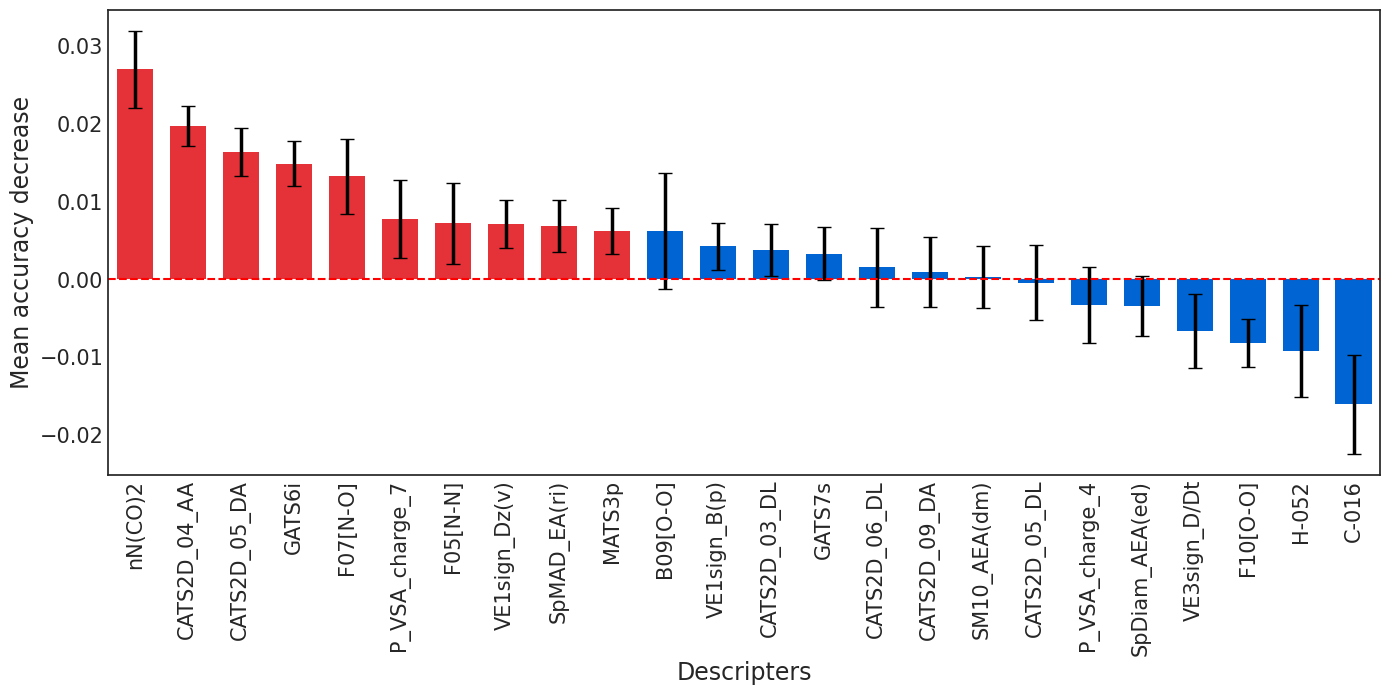

In [67]:
plt.rcParams['figure.figsize'] = (14,8) 
fig, ax = plt.subplots()
plt.xlim(-0.50,23.5) 
plt.tick_params(labelsize=15) 
error_attri=dict(elinewidth=2.5,ecolor="black",capsize=5)
#Feature_importance.plot.bar(x='Descripter',y='Mean',rot=0,yerr='Se',facecolor = '#f5af02', edgecolor = 'white',error_kw=error_attri,ax=ax)
plt.bar(range(0,24),Feature_importance['Mean'],color=10*["#e53238"]+14*["#0064d2"],yerr=Feature_importance['Se'],width=0.68,error_kw=error_attri)
ax.set_ylabel("Mean accuracy decrease",fontsize = 17)
plt.xticks(rotation=90)
plt.xlabel('Descripters',fontsize = 17)
fig.tight_layout()
plt.axhline(y=0,ls="--",c="red")
plt.gcf().subplots_adjust(bottom=0.40)
xticks = range(24)
xticklabels = Feature_importance.index
plt.xticks(xticks, xticklabels)
ax.get_legend()
plt.savefig("./Original figure/Fig. S8.svg", dpi=600,format="svg")
plt.show()


## Fig. S9

In [194]:
Raw_all_data=X_NAomit_data[["ALOGP","ESOL","Hy","TPSA(Tot)"]]
print_RxC(Raw_all_data)
Raw_all_data.head()

71 Moleculars × 4 Descriptors


,ALOGP,ESOL,Hy,TPSA(Tot)
ID,,,,
Ma_2019_A,-2.0201,-0.635691,3.098550,139.54
Ma_2019_U,-2.4504,0.193797,2.293407,124.78
Ma_2019_C,-2.4272,0.044637,3.232038,130.83
Ma_2019_G,-2.4107,-0.254351,4.009955,159.51
Ma_2019_dA,-1.2538,-1.136191,2.213815,119.31


In [195]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Raw_all_data)
X_scaled_data=Transformer.transform(Raw_all_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Raw_all_data.columns
X_scaled_data.index=Raw_all_data.index
Raw_data= pd.read_csv('./Original data/Raw_data.csv',index_col=0)
X_scaled_data['Hydrogel-forming ability']=Raw_data['Hydrogel-forming ability']
print_RxC(X_scaled_data)
X_scaled_data.head()

71 Moleculars × 5 Descriptors


,ALOGP,ESOL,Hy,TPSA(Tot),Hydrogel-forming ability
ID,,,,,
Ma_2019_A,0.117842,0.874849,0.443413,0.472652,Gelator
Ma_2019_U,0.078096,1.000000,0.286732,0.330770,Gelator
Ma_2019_C,0.080239,0.977495,0.469390,0.388926,Gelator
Ma_2019_G,0.081763,0.932384,0.620773,0.664616,Gelator
Ma_2019_dA,0.188622,0.799334,0.271243,0.278189,Gelator


In [197]:
df=pd.melt(X_scaled_data,id_vars=['Hydrogel-forming ability'])
df["Descriptors"]=df["variable"]
df["Values"]=df["value"]
df.to_csv("./Results/Figs/Supplementary Fig. 9.csv",sep=',')

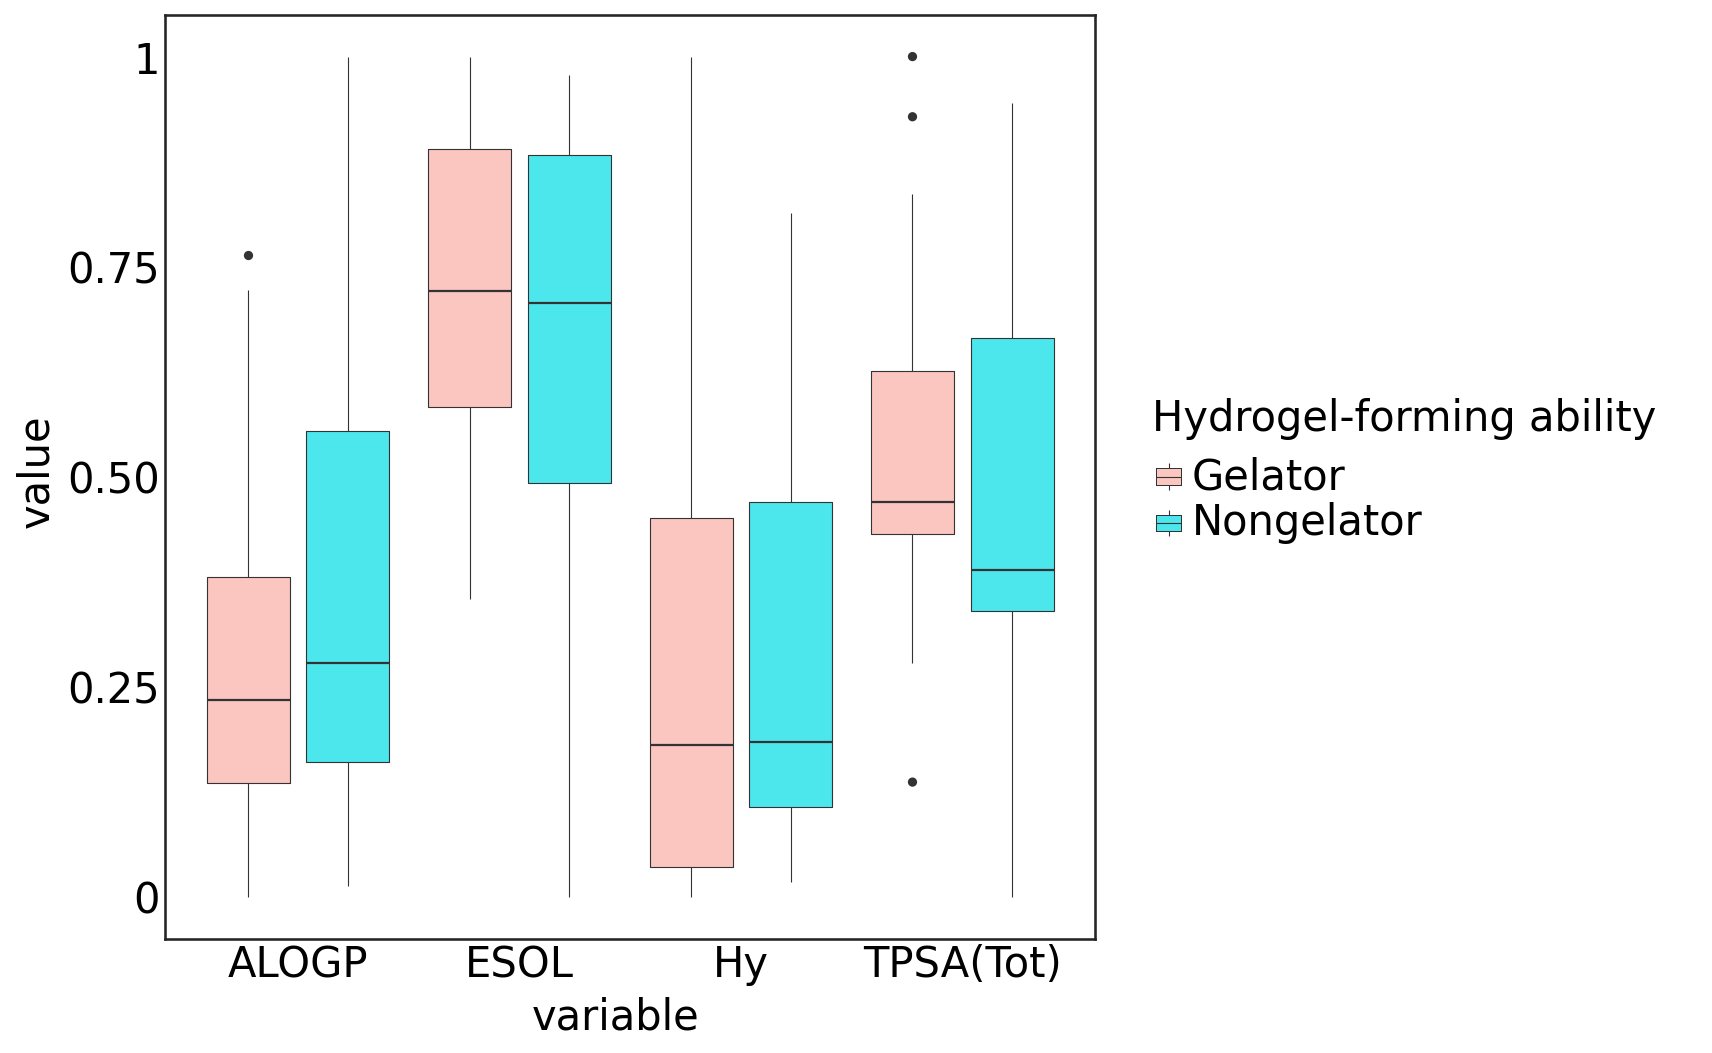

In [198]:
box2_plot=(ggplot(df, aes(x = "variable", y = "value"))
+ geom_boxplot(aes(fill="Hydrogel-forming ability"),position = position_dodge(0.9),size=0.3) 
+ guides(fill=guide_legend(title="Hydrogel-forming ability"))
+scale_fill_hue(s = 0.9, l = 0.85, h=0.05,color_space='husl')
+theme_matplotlib()
+theme(legend_position='right',
       text=element_text(size=20,colour = "black"),
       dpi=150,
       figure_size=(8,8)))
print(box2_plot)
box2_plot.save("./Original figure/Fig. S9.svg", units="in", dpi=300)

## Fig. S10

In [6]:
from plotnine import *
X_LR_feature=pd.read_csv("./Results/Supplementary Data S5.csv",sep=',',index_col=[0],header=[0,1])
X_LR_feature.index

Index(['C-016', 'H-052', 'F10[O-O]', 'VE3sign_D/Dt', 'SpDiam_AEA(ed)',
       'P_VSA_charge_4', 'CATS2D_05_DL', 'SM10_AEA(dm)', 'CATS2D_09_DA',
       'CATS2D_06_DL', 'GATS7s', 'CATS2D_03_DL', 'VE1sign_B(p)', 'B09[O-O]',
       'MATS3p', 'SpMAD_EA(ri)', 'VE1sign_Dz(v)', 'F05[N-N]', 'P_VSA_charge_7',
       'F07[N-O]', 'GATS6i', 'CATS2D_05_DA', 'CATS2D_04_AA', 'nN(CO)2'],
      dtype='object')

In [9]:
Raw_all_data=X_NAomit_data[X_LR_feature.index.tolist()]
print_RxC(Raw_all_data)
Raw_data= pd.read_csv('./Original data/Raw_data.csv',index_col=0)
Raw_all_data.head()

71 Moleculars × 24 Descriptors


,C-016,H-052,F10[O-O],VE3sign_D/Dt,SpDiam_AEA(ed),P_VSA_charge_4,CATS2D_05_DL,SM10_AEA(dm),CATS2D_09_DA,CATS2D_06_DL,...,MATS3p,SpMAD_EA(ri),VE1sign_Dz(v),F05[N-N],P_VSA_charge_7,F07[N-O],GATS6i,CATS2D_05_DA,CATS2D_04_AA,nN(CO)2
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.0,0.0,0.0,-3.162861,6.452423,0.00000,0.0,11.607041,2.0,0.0,...,-0.085445,1.396748,0.254645,0.0,0.000000,4.0,0.908619,4.0,5.0,0.0
Ma_2019_U,1.0,0.0,0.0,-1.441985,6.337919,0.00000,1.0,11.152723,1.0,1.0,...,-0.087509,1.406773,0.077999,0.0,0.000000,1.0,0.931446,4.0,5.0,1.0
Ma_2019_C,1.0,0.0,0.0,-1.441985,6.337919,16.78553,1.0,11.152723,1.0,1.0,...,-0.100433,1.387408,0.066562,0.0,9.476247,2.0,0.994197,4.0,4.0,0.0
Ma_2019_G,0.0,0.0,0.0,-2.781456,6.451673,16.78553,0.0,11.639705,3.0,0.0,...,-0.047845,1.418020,0.196205,1.0,0.000000,4.0,0.972681,5.0,6.0,0.0
Ma_2019_dA,0.0,0.0,0.0,-3.041917,6.337624,0.00000,0.0,11.234674,2.0,1.0,...,-0.061137,1.395602,0.301976,0.0,0.000000,2.0,0.962266,1.0,5.0,0.0


In [10]:
X_test= pd.read_csv('./Original data/X_test_original_data.csv',index_col=0)
Raw_X_test_data=X_test[X_LR_feature.index.tolist()]
Raw_X_test_data.head()

,C-016,H-052,F10[O-O],VE3sign_D/Dt,SpDiam_AEA(ed),P_VSA_charge_4,CATS2D_05_DL,SM10_AEA(dm),CATS2D_09_DA,CATS2D_06_DL,...,MATS3p,SpMAD_EA(ri),VE1sign_Dz(v),F05[N-N],P_VSA_charge_7,F07[N-O],GATS6i,CATS2D_05_DA,CATS2D_04_AA,nN(CO)2
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.0,2.0,0.0,-1.941131,6.394958,16.78553,1.0,11.188448,0.0,1.0,...,-0.118664,1.391659,0.300164,0.0,2.534532,0.0,0.712369,0.0,2.0,0.0
13463,0.0,0.0,0.0,-3.162861,6.452423,0.00000,1.0,11.607041,0.0,0.0,...,-0.110019,1.378088,0.224378,0.0,0.000000,2.0,0.943004,2.0,4.0,0.0
39148,0.0,0.0,0.0,-2.218807,6.521932,0.00000,0.0,11.852001,2.0,0.0,...,-0.147753,1.406512,0.210115,0.0,16.792754,4.0,0.585936,4.0,5.0,0.0
56328,0.0,0.0,0.0,-3.088037,6.399892,0.00000,0.0,11.427769,2.0,0.0,...,-0.030999,1.387856,0.315230,0.0,0.000000,2.0,1.025573,1.0,3.0,0.0
67358,0.0,0.0,0.0,-3.261933,6.545830,0.00000,0.0,11.970594,2.0,0.0,...,-0.094554,1.409046,0.265669,0.0,0.000000,4.0,0.915414,4.0,7.0,0.0


In [11]:
X_raw_data= pd.concat([Raw_all_data,Raw_X_test_data])
X_raw_data

,C-016,H-052,F10[O-O],VE3sign_D/Dt,SpDiam_AEA(ed),P_VSA_charge_4,CATS2D_05_DL,SM10_AEA(dm),CATS2D_09_DA,CATS2D_06_DL,...,MATS3p,SpMAD_EA(ri),VE1sign_Dz(v),F05[N-N],P_VSA_charge_7,F07[N-O],GATS6i,CATS2D_05_DA,CATS2D_04_AA,nN(CO)2
Ma_2019_A,0.0,0.0,0.0,-3.162861,6.452423,0.000000,0.0,11.607041,2.0,0.0,...,-0.085445,1.396748,0.254645,0.0,0.000000,4.0,0.908619,4.0,5.0,0.0
Ma_2019_U,1.0,0.0,0.0,-1.441985,6.337919,0.000000,1.0,11.152723,1.0,1.0,...,-0.087509,1.406773,0.077999,0.0,0.000000,1.0,0.931446,4.0,5.0,1.0
Ma_2019_C,1.0,0.0,0.0,-1.441985,6.337919,16.785530,1.0,11.152723,1.0,1.0,...,-0.100433,1.387408,0.066562,0.0,9.476247,2.0,0.994197,4.0,4.0,0.0
Ma_2019_G,0.0,0.0,0.0,-2.781456,6.451673,16.785530,0.0,11.639705,3.0,0.0,...,-0.047845,1.418020,0.196205,1.0,0.000000,4.0,0.972681,5.0,6.0,0.0
Ma_2019_dA,0.0,0.0,0.0,-3.041917,6.337624,0.000000,0.0,11.234674,2.0,1.0,...,-0.061137,1.395602,0.301976,0.0,0.000000,2.0,0.962266,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121487078,1.0,1.0,0.0,-1.669109,6.390741,31.059356,2.0,10.300073,2.0,1.0,...,-0.048122,1.379619,0.037292,0.0,5.069063,2.0,1.007760,1.0,3.0,1.0
121487098,1.0,0.0,0.0,-1.573210,6.606740,1.899093,0.0,11.963540,2.0,0.0,...,-0.039326,1.398395,0.061296,2.0,0.000000,4.0,1.082626,5.0,3.0,1.0
121487432,0.0,0.0,0.0,-1.919212,6.949909,44.880340,2.0,13.054709,1.0,1.0,...,-0.221894,1.424747,0.034355,0.0,8.825204,1.0,0.998360,4.0,3.0,1.0
6482243,1.0,0.0,0.0,-1.480656,6.589373,0.000000,1.0,11.205218,1.0,1.0,...,-0.012898,1.354732,0.191156,0.0,17.426563,1.0,1.005142,1.0,5.0,1.0


In [12]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(X_raw_data)
X_scaled_data=Transformer.transform(X_raw_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=X_raw_data.columns
X_scaled_data.index=X_raw_data.index
print_RxC(X_scaled_data)
X_scaled_data.head()

7328 Moleculars × 24 Descriptors


,C-016,H-052,F10[O-O],VE3sign_D/Dt,SpDiam_AEA(ed),P_VSA_charge_4,CATS2D_05_DL,SM10_AEA(dm),CATS2D_09_DA,CATS2D_06_DL,...,MATS3p,SpMAD_EA(ri),VE1sign_Dz(v),F05[N-N],P_VSA_charge_7,F07[N-O],GATS6i,CATS2D_05_DA,CATS2D_04_AA,nN(CO)2
Ma_2019_A,0.00,0.0,0.0,0.628222,0.247455,0.000000,0.000,0.253131,0.181818,0.000,...,0.539350,0.548510,0.345419,0.000,0.000000,0.363636,0.428319,0.333333,0.416667,0.000000
Ma_2019_U,0.25,0.0,0.0,0.849062,0.216419,0.000000,0.125,0.220615,0.090909,0.125,...,0.536608,0.585372,0.105737,0.000,0.000000,0.090909,0.450876,0.333333,0.416667,0.333333
Ma_2019_C,0.25,0.0,0.0,0.849062,0.216419,0.157724,0.125,0.220615,0.090909,0.125,...,0.519440,0.514169,0.090219,0.000,0.068737,0.181818,0.512882,0.333333,0.333333,0.000000
Ma_2019_G,0.00,0.0,0.0,0.677168,0.247251,0.157724,0.000,0.255469,0.272727,0.000,...,0.589298,0.626723,0.266124,0.125,0.000000,0.363636,0.491622,0.416667,0.500000,0.000000
Ma_2019_dA,0.00,0.0,0.0,0.643743,0.216339,0.000000,0.000,0.226481,0.181818,0.125,...,0.571641,0.544296,0.409640,0.000,0.000000,0.181818,0.481330,0.083333,0.416667,0.000000


In [13]:
A=X_scaled_data.iloc[0:71] 
A['Group']='Published'
A

,C-016,H-052,F10[O-O],VE3sign_D/Dt,SpDiam_AEA(ed),P_VSA_charge_4,CATS2D_05_DL,SM10_AEA(dm),CATS2D_09_DA,CATS2D_06_DL,...,SpMAD_EA(ri),VE1sign_Dz(v),F05[N-N],P_VSA_charge_7,F07[N-O],GATS6i,CATS2D_05_DA,CATS2D_04_AA,nN(CO)2,Group
Ma_2019_A,0.00,0.000000,0.0,0.628222,0.247455,0.000000,0.000,0.253131,0.181818,0.000,...,0.548510,0.345419,0.000,0.000000,0.363636,0.428319,0.333333,0.416667,0.000000,Published
Ma_2019_U,0.25,0.000000,0.0,0.849062,0.216419,0.000000,0.125,0.220615,0.090909,0.125,...,0.585372,0.105737,0.000,0.000000,0.090909,0.450876,0.333333,0.416667,0.333333,Published
Ma_2019_C,0.25,0.000000,0.0,0.849062,0.216419,0.157724,0.125,0.220615,0.090909,0.125,...,0.514169,0.090219,0.000,0.068737,0.181818,0.512882,0.333333,0.333333,0.000000,Published
Ma_2019_G,0.00,0.000000,0.0,0.677168,0.247251,0.157724,0.000,0.255469,0.272727,0.000,...,0.626723,0.266124,0.125,0.000000,0.363636,0.491622,0.416667,0.500000,0.000000,Published
Ma_2019_dA,0.00,0.000000,0.0,0.643743,0.216339,0.000000,0.000,0.226481,0.181818,0.125,...,0.544296,0.409640,0.000,0.000000,0.181818,0.481330,0.083333,0.416667,0.000000,Published
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,0.25,0.000000,0.0,0.849062,0.216419,0.157724,0.125,0.220615,0.090909,0.125,...,0.514169,0.090219,0.000,0.068737,0.181818,0.512882,0.333333,0.333333,0.000000,Published
Tang_2019_DideoxyC,0.25,0.142857,0.0,0.876375,0.132953,0.157724,0.000,0.141728,0.090909,0.125,...,0.438803,0.237471,0.000,0.105506,0.090909,0.554733,0.083333,0.166667,0.000000,Published
Peters_2014_3,0.00,0.000000,0.0,0.628222,0.247455,0.000000,0.000,0.253131,0.181818,0.000,...,0.608754,0.265850,0.000,0.000000,0.272727,0.405335,0.333333,0.500000,0.000000,Published
Plank_2016_2,0.00,0.000000,0.0,0.677168,0.247251,0.157724,0.125,0.255469,0.000000,0.000,...,0.494855,0.204741,0.125,0.000000,0.181818,0.434983,0.250000,0.416667,0.000000,Published


In [16]:
B=X_scaled_data.iloc[71:7328] 
B['Group']='Pubchem'
B

,C-016,H-052,F10[O-O],VE3sign_D/Dt,SpDiam_AEA(ed),P_VSA_charge_4,CATS2D_05_DL,SM10_AEA(dm),CATS2D_09_DA,CATS2D_06_DL,...,SpMAD_EA(ri),VE1sign_Dz(v),F05[N-N],P_VSA_charge_7,F07[N-O],GATS6i,CATS2D_05_DA,CATS2D_04_AA,nN(CO)2,Group
5273,0.00,0.142857,0.0,0.785006,0.231879,0.157724,0.125,0.223172,0.000000,0.125,...,0.529798,0.407181,0.00,0.018385,0.000000,0.234399,0.000000,0.166667,0.000000,Pubchem
13463,0.00,0.000000,0.0,0.628222,0.247455,0.000000,0.125,0.253131,0.000000,0.000,...,0.479899,0.304351,0.00,0.000000,0.181818,0.462297,0.166667,0.333333,0.000000,Pubchem
39148,0.00,0.000000,0.0,0.749372,0.266295,0.000000,0.000,0.270663,0.181818,0.000,...,0.584412,0.284998,0.00,0.121808,0.363636,0.109465,0.333333,0.416667,0.000000,Pubchem
56328,0.00,0.000000,0.0,0.637824,0.233217,0.000000,0.000,0.240301,0.181818,0.000,...,0.515815,0.427623,0.00,0.000000,0.181818,0.543886,0.083333,0.250000,0.000000,Pubchem
67358,0.00,0.000000,0.0,0.615508,0.272772,0.000000,0.000,0.279151,0.181818,0.000,...,0.593728,0.360376,0.00,0.000000,0.363636,0.435034,0.333333,0.583333,0.000000,Pubchem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121487078,0.25,0.071429,0.0,0.819915,0.230736,0.291846,0.250,0.159591,0.181818,0.125,...,0.485529,0.050504,0.00,0.036769,0.181818,0.526284,0.083333,0.250000,0.333333,Pubchem
121487098,0.25,0.000000,0.0,0.832222,0.289281,0.017845,0.000,0.278646,0.181818,0.000,...,0.554567,0.083073,0.25,0.000000,0.363636,0.600262,0.416667,0.250000,0.333333,Pubchem
121487432,0.00,0.000000,0.0,0.787819,0.382294,0.421714,0.250,0.356742,0.090909,0.125,...,0.651457,0.046519,0.00,0.064015,0.090909,0.516995,0.333333,0.250000,0.333333,Pubchem
6482243,0.25,0.000000,0.0,0.844099,0.284574,0.000000,0.125,0.224372,0.090909,0.125,...,0.394022,0.259274,0.00,0.126406,0.090909,0.523697,0.083333,0.416667,0.333333,Pubchem


In [17]:
X_data= pd.concat([A,B])
X_data.to_csv("./Results/Figs/Supplementary Fig. 10.csv",sep=',')
X_data

,C-016,H-052,F10[O-O],VE3sign_D/Dt,SpDiam_AEA(ed),P_VSA_charge_4,CATS2D_05_DL,SM10_AEA(dm),CATS2D_09_DA,CATS2D_06_DL,...,SpMAD_EA(ri),VE1sign_Dz(v),F05[N-N],P_VSA_charge_7,F07[N-O],GATS6i,CATS2D_05_DA,CATS2D_04_AA,nN(CO)2,Group
Ma_2019_A,0.00,0.000000,0.0,0.628222,0.247455,0.000000,0.000,0.253131,0.181818,0.000,...,0.548510,0.345419,0.000,0.000000,0.363636,0.428319,0.333333,0.416667,0.000000,Published
Ma_2019_U,0.25,0.000000,0.0,0.849062,0.216419,0.000000,0.125,0.220615,0.090909,0.125,...,0.585372,0.105737,0.000,0.000000,0.090909,0.450876,0.333333,0.416667,0.333333,Published
Ma_2019_C,0.25,0.000000,0.0,0.849062,0.216419,0.157724,0.125,0.220615,0.090909,0.125,...,0.514169,0.090219,0.000,0.068737,0.181818,0.512882,0.333333,0.333333,0.000000,Published
Ma_2019_G,0.00,0.000000,0.0,0.677168,0.247251,0.157724,0.000,0.255469,0.272727,0.000,...,0.626723,0.266124,0.125,0.000000,0.363636,0.491622,0.416667,0.500000,0.000000,Published
Ma_2019_dA,0.00,0.000000,0.0,0.643743,0.216339,0.000000,0.000,0.226481,0.181818,0.125,...,0.544296,0.409640,0.000,0.000000,0.181818,0.481330,0.083333,0.416667,0.000000,Published
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121487078,0.25,0.071429,0.0,0.819915,0.230736,0.291846,0.250,0.159591,0.181818,0.125,...,0.485529,0.050504,0.000,0.036769,0.181818,0.526284,0.083333,0.250000,0.333333,Pubchem
121487098,0.25,0.000000,0.0,0.832222,0.289281,0.017845,0.000,0.278646,0.181818,0.000,...,0.554567,0.083073,0.250,0.000000,0.363636,0.600262,0.416667,0.250000,0.333333,Pubchem
121487432,0.00,0.000000,0.0,0.787819,0.382294,0.421714,0.250,0.356742,0.090909,0.125,...,0.651457,0.046519,0.000,0.064015,0.090909,0.516995,0.333333,0.250000,0.333333,Pubchem
6482243,0.25,0.000000,0.0,0.844099,0.284574,0.000000,0.125,0.224372,0.090909,0.125,...,0.394022,0.259274,0.000,0.126406,0.090909,0.523697,0.083333,0.416667,0.333333,Pubchem


In [18]:
df=pd.melt(X_data,id_vars=['Group'])
df["Descriptors"]=df["variable"]
df["Values"]=df["value"]
df

,Group,variable,value,Descriptors,Values
0,Published,C-016,0.000000,C-016,0.000000
1,Published,C-016,0.250000,C-016,0.250000
2,Published,C-016,0.250000,C-016,0.250000
3,Published,C-016,0.000000,C-016,0.000000
4,Published,C-016,0.000000,C-016,0.000000
...,...,...,...,...,...
175867,Pubchem,nN(CO)2,0.333333,nN(CO)2,0.333333
175868,Pubchem,nN(CO)2,0.333333,nN(CO)2,0.333333
175869,Pubchem,nN(CO)2,0.333333,nN(CO)2,0.333333
175870,Pubchem,nN(CO)2,0.333333,nN(CO)2,0.333333


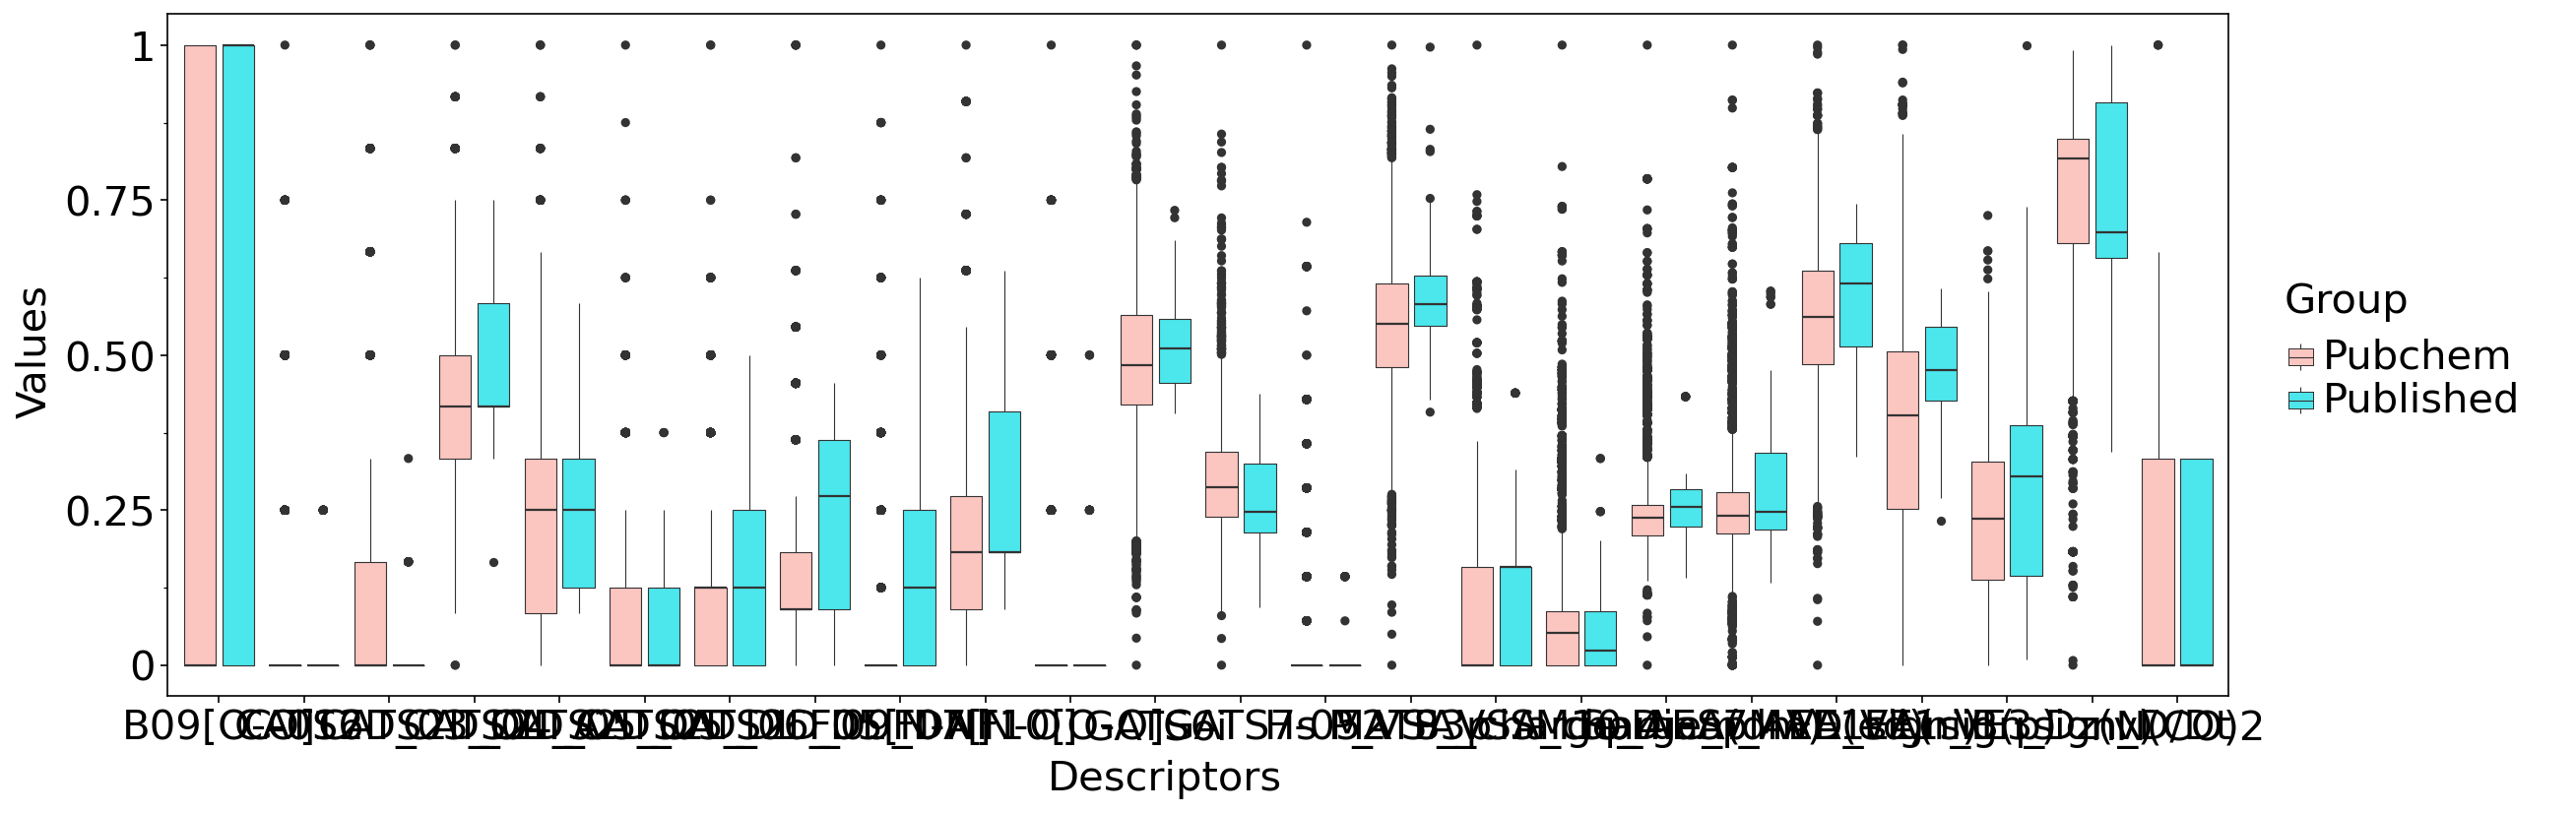

In [19]:
box2_plot=(ggplot(df, aes(x = "Descriptors", y = "Values"))
+ geom_boxplot(aes(fill="Group"),position = position_dodge(0.9),size=0.3) 
+ guides(fill=guide_legend(title="Group"))
+scale_fill_hue(s = 0.9, l = 0.85, h=0.05,color_space='husl')
+theme_matplotlib()
+theme(legend_position='right',
       text=element_text(size=20,colour = "black"),
       dpi=150,
       figure_size=(18,6)))
print(box2_plot)
box2_plot.save("./Original figure/Fig. S10.svg", units="in", dpi=300)

## Fig S11

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=0)
pca.fit(X_scaled_data)
print(pca.explained_variance_ratio_)  
print(pca.explained_variance_)  
print(pca.n_features_)
print(pca.n_features_in_)

[0.46033672 0.11839695]
[0.27020261 0.06949514]
24
24


In [29]:
newdf = pca.fit_transform(X_scaled_data)
PCA_4175=pd.DataFrame(newdf)
PCA_4175.columns=["PCA1","PCA2"]
PCA_4175.index=X_scaled_data.index
PCA_4175['group']=X_data['Group']
PCA_4175.to_csv("./Results/Figs/Supplementary Fig. 11.csv",sep=',')
PCA_4175.head()

,PCA1,PCA2,group
Ma_2019_A,-0.532565,0.251497,Published
Ma_2019_U,0.582754,-0.163999,Published
Ma_2019_C,-0.460656,-0.134857,Published
Ma_2019_G,0.480772,0.401649,Published
Ma_2019_dA,-0.527324,0.033116,Published


In [30]:
x0 = PCA_4175[PCA_4175['group'] == 'Published']
x1 = PCA_4175[PCA_4175['group'] == 'Pubchem']

In [31]:
x0['GEL'] =Raw_data['Hydrogel-forming ability']
x2 = x0[x0['GEL'] == 'Gelator']
x3 = x0[x0['GEL'] == 'Nongelator']

In [32]:
x0.to_csv("./Results/x0.csv",sep=',')
x1.to_csv("./Results/x1.csv",sep=',')
x2.to_csv("./Results/x2.csv",sep=',')
x3.to_csv("./Results/x3.csv",sep=',')
x2.head()

,PCA1,PCA2,group,GEL
Ma_2019_A,-0.532565,0.251497,Published,Gelator
Ma_2019_U,0.582754,-0.163999,Published,Gelator
Ma_2019_C,-0.460656,-0.134857,Published,Gelator
Ma_2019_G,0.480772,0.401649,Published,Gelator
Ma_2019_dA,-0.527324,0.033116,Published,Gelator


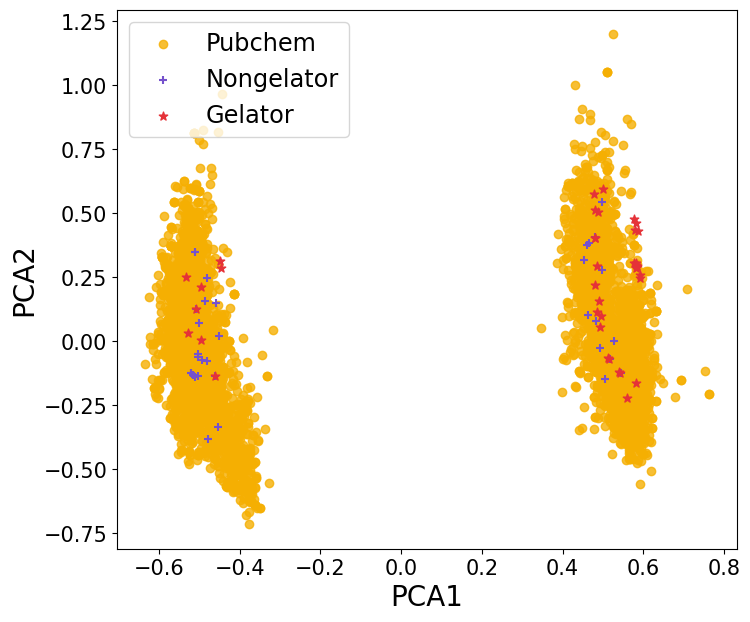

In [33]:
plt.rcParams['figure.figsize'] = (8, 7) 
plt.scatter(x1.iloc[:, 0], x1.iloc[:, 1],  alpha=0.8, c = "#f5af02", marker='o', label='Pubchem')
plt.scatter(x3.iloc[:, 0], x3.iloc[:, 1],   s=40, c = "#7552cc", marker='+', label='Nongelator')
plt.scatter(x2.iloc[:, 0], x2.iloc[:, 1], s=40, c = "#e53238", marker='*', label='Gelator')
plt.tick_params(labelsize=15 )
#8db9ca
plt.xlabel('PCA1',fontsize = 20)
plt.ylabel('PCA2',fontsize = 20)
plt.legend(loc=2,fontsize='xx-large')
plt.savefig("./Original figure/Fig. S11.svg", dpi=300,format="svg")
plt.show()
